<a href="https://colab.research.google.com/github/Sairam307/ML-regression-project/blob/main/Bike_Sharing_Demand_Prediction_ML_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Bike Sharing Demand Prediction**




##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

This project aims to develop a machine learning model for accurately predicting the demand for bike sharing services. The availability and popularity of bike sharing systems have increased significantly in recent years, and accurately predicting the demand can help optimize the allocation and distribution of bikes, improving the overall user experience and operational efficiency.

The project utilizes a comprehensive dataset that includes historical information about bike sharing usage patterns, such as weather conditions, time of day, day of the week, and other relevant factors. This dataset will serve as the foundation for training and evaluating the machine learning regression model.

The project's success will be measured by the accuracy of the demand predictions achieved by the developed machine learning regression model. By accurately forecasting bike sharing demand,
 
he bike sharing demand prediction project using machine learning regression aims to develop a reliable and accurate model for forecasting bike usage patterns. By leveraging historical data and advanced machine learning techniques, the project will provide valuable insights to optimize bike sharing services, benefiting both users and service providers.

# **GitHub Link -**

https://github.com/Sairam307/ML-regression-project.git

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [215]:
# Import Libraries
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import math
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid",{'grid.linestyle': '--'})

### Dataset Loading

In [216]:
#Mount Drive
from google.colab import drive
drive.mount('/content/Drive')



Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [217]:
# Load Dataset
file_path ='/content/Drive/MyDrive/Alma/SeoulBikeData.csv'

In [218]:
data = pd.read_csv(file_path, encoding = "ISO-8859-1")

### Dataset First View

In [219]:
# Dataset First Look
#head
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [220]:
#tail
data.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [221]:
# Dataset Rows & Columns count
print(f' The Data contains total {data.shape[0]} rows and {data.shape[1]} columns')

 The Data contains total 8760 rows and 14 columns


### Dataset Information

In [222]:
# Dataset Info
#dislays the data types of each column and non null calue count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [223]:
# creating a copy of our dataset
df = data.copy()

In [224]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [225]:
#Since the variables having units with name, renaming columns for better variable analysis.
df.rename(columns={'Rented_Bike_Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},inplace=True)

In [226]:
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [227]:
# Change The datatype of Date columns to extract 'Month' ,'Day', "year". so  further we can analyze the Bike rentals with respect to year months and days.
df['Date']=df['Date'].astype('datetime64[ns]')

# Creating new columns 'Month', 'Year' ,'Day.
df['month']=df['Date'].dt.month

df['Day']=df['Date'].dt.day_name()                  #dt.day_name() and dt.month_name()  will give day names and month names
                                                                # dt.month will give month numbers as 1,2,3,...12 

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [229]:
#  Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.
df['Weekdays_or_weekend']=df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

#### Duplicate Values

In [230]:
# Dataset Duplicate Value Count
df.duplicated().value_counts() 

False    8760
dtype: int64

#### Missing Values/Null Values

In [231]:
# Missing Values/Null Values Count
# looking for  Columns having missing values.
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
Date                       0      0.0
Rainfall                   0      0.0
Day                        0      0.0
month                      0      0.0
Functioning_Day            0      0.0
Holiday                    0      0.0
Seasons                    0      0.0
Snowfall                   0      0.0
Solar_Radiation            0      0.0
Rented_Bike_Count          0      0.0
Dew_point_temperature      0      0.0
Visibility                 0      0.0
Wind_speed                 0      0.0
Humidity                   0      0.0
Temperature                0      0.0
Hour                       0      0.0
Weekdays_or_weekend        0      0.0

<Axes: >

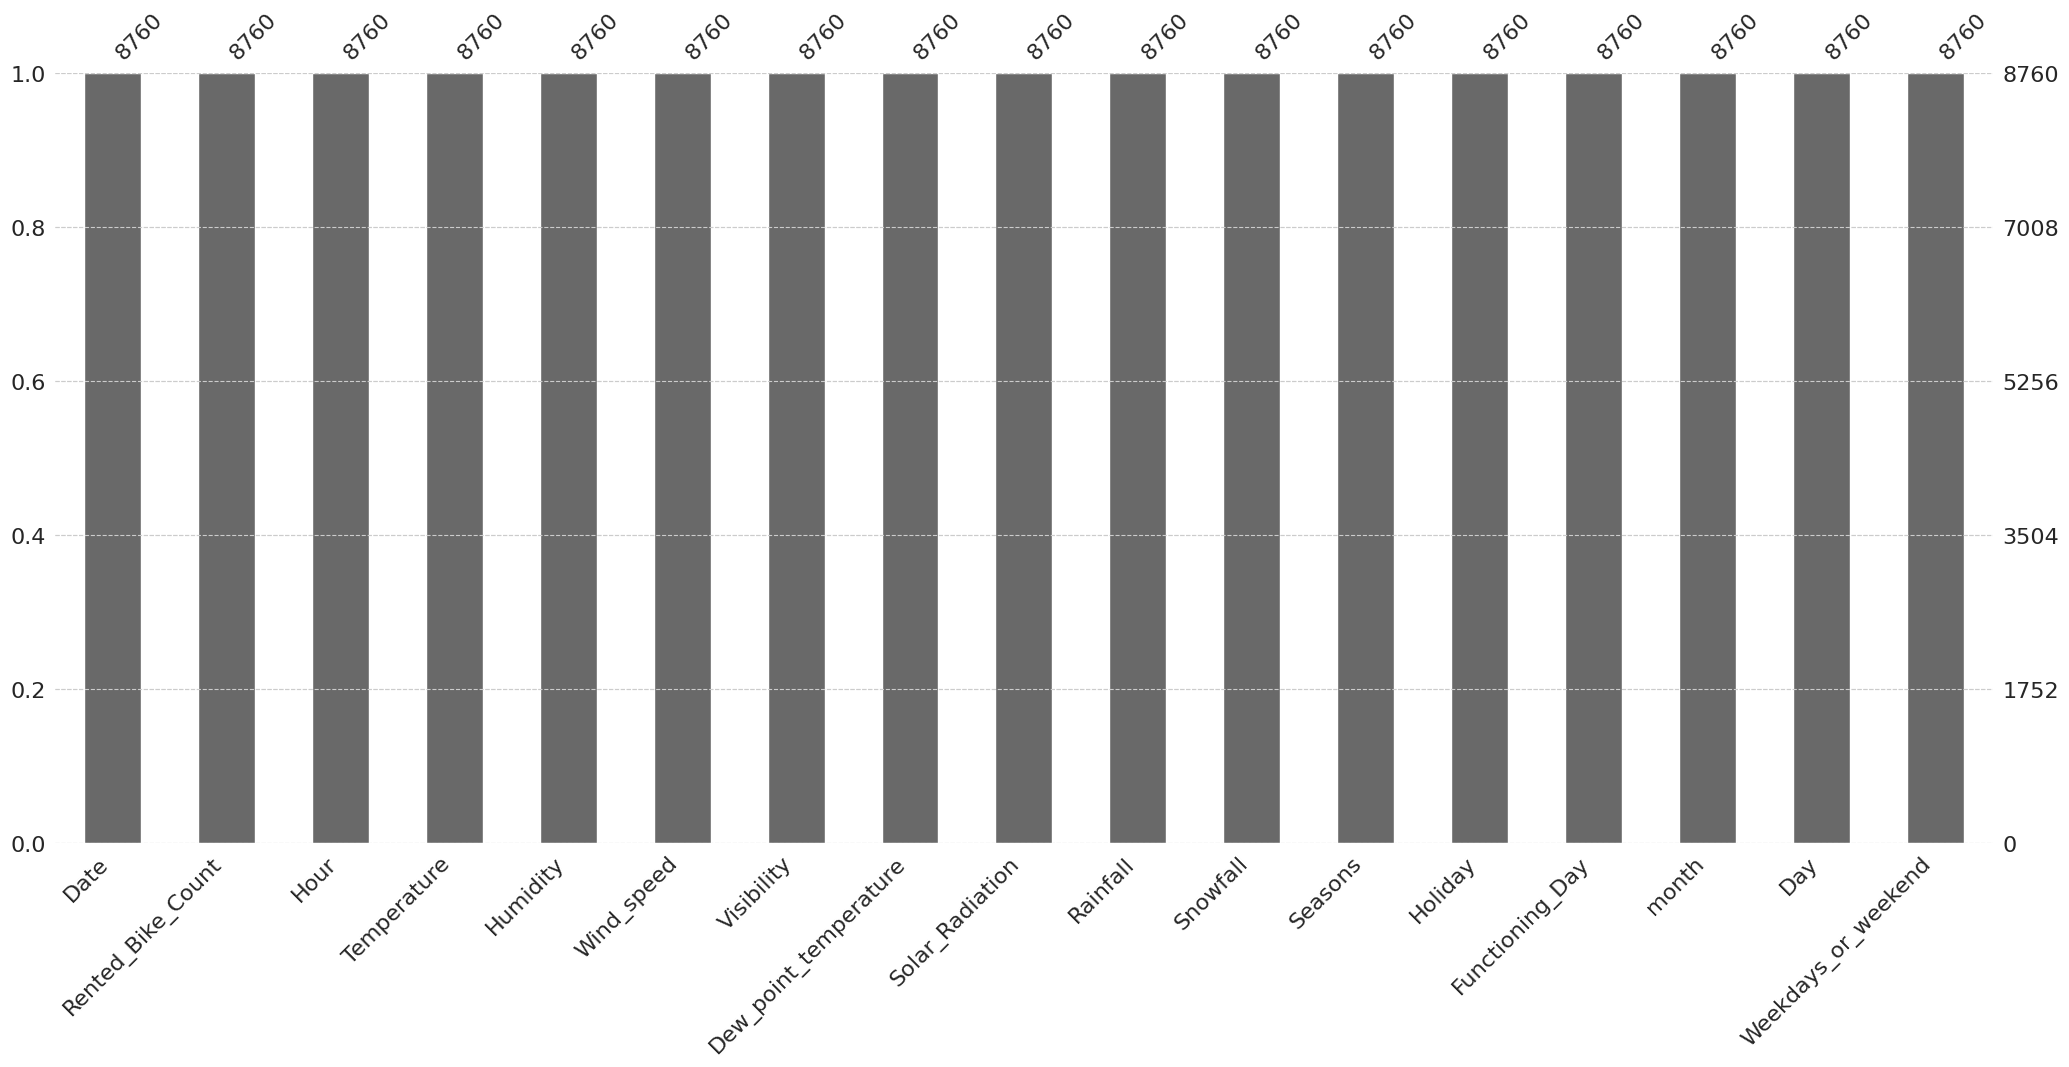

In [232]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)

### What did you know about your dataset?

there is no Missing/Null Values in the dataset

## ***2. Understanding Your Variables***

In [233]:
# Dataset Columns
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'month', 'Day', 'Weekdays_or_weekend'],
      dtype='object')

In [234]:
# Dataset Describe
df.describe()

Rented_Bike_Count         Hour  Temperature     Humidity   Wind_speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew_point_temperature  Solar_Radiation     Rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.868746     1.128193   
min      27.000000             -30.600000         0.000000     0.000000   
25%     940.000000              -4.700000         0.000000     0.000000   
50%    1698.000000               5.100000         0.010000     0.000000   
75%    2000.000000              14.800000         0.930000     0.000000   
max    2000.000000              27.200000         3.520000    35.000000   

          Snowfall        month  Weekdays_or_weekend  
count  8760.000000  8760.000000          8760.000000  
mean      0.075068     6.526027             0.290411  
std       0.436746     3.448048             0.453978  
min       0.000000     1.000000             0.000000  
25%       0.000000     4.000000             0.000000  
50%       0.000000     7.000000             0.000000  
75%       0.000000    10.000000             1.000000  
max       8.800000    12.000000             1.000000

### Variables Description 

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information).

Attribute Information:



1.   Date : year-month-day
2.   Rented_Bike_Count - Count of bikes rented at each hour
3. Hour - Hour of he day
4.Temperature-Temperature in Celsius
5.Humidity - %
6.Windspeed - m/s
7.Visibility - 10m
8.Dew point temperature - Celsius
9.Solar radiation - MJ/m2
10.Rainfall - mm
11.Snowfall - cm
12.Seasons - Winter, Spring, Summer, Autumn
13.Holiday - Holiday/No holiday
14.Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)



### Check Unique Values for each variable.

In [235]:
# Check Unique Values for each variable.
unique_count = df.nunique().sort_values(ascending=False)
print(unique_count)

Rented_Bike_Count        2166
Visibility               1789
Dew_point_temperature     556
Temperature               546
Date                      365
Solar_Radiation           345
Humidity                   90
Wind_speed                 65
Rainfall                   61
Snowfall                   51
Hour                       24
month                      12
Day                         7
Seasons                     4
Holiday                     2
Functioning_Day             2
Weekdays_or_weekend         2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [236]:
# Checking duplicate
df.duplicated().sum()

0

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [238]:
# convert Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

In [239]:
# Date columns to Date format conversion
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

In [240]:
#Get distinct categories counts forSeasons categories
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [241]:
#Get distinct categories counts for Holiday categories
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [242]:
#Get distinct categories counts for Functioning_Day categories
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [243]:
#Get distinct categories counts for for Month categories
df['month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: month, dtype: int64

In [244]:
#Get distinct categories counts for for Weekdays_or_weekend categories
df['Weekdays_or_weekend'].value_counts()

0    6216
1    2544
Name: Weekdays_or_weekend, dtype: int64

In [245]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

### What all manipulations have you done and insights you found?

there are no duplicates found in the data set. it contains 14 features(columns) and 8760 rows of data, converted hour column  data from int type to categorical,
date column to date type format.When we observe the data we realize that Hour column is a numerical column but it is a time stamp so we have to treat Hour as a categorical feature

divided the data into two categories


1.   numerical features
2.   categorical features




In [246]:
numeric_features.head()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  month  \
0                  -17.6              0.0       0.0       0.0      1   
1                  -17.6              0.0       0.0       0.0      1   
2                  -17.7              0.0       0.0       0.0      1   
3                  -17.6              0.0       0.0       0.0      1   
4                  -18.6              0.0       0.0       0.0      1   

   Weekdays_or_weekend  weekdays_weekend  
0                    0                 0  
1                    0                 0  
2                    0                 0  
3                    0                 0  
4                    0                 0

In [247]:
# Numeric Features info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Temperature            8760 non-null   float64
 2   Humidity               8760 non-null   int64  
 3   Wind_speed             8760 non-null   float64
 4   Visibility             8760 non-null   int64  
 5   Dew_point_temperature  8760 non-null   float64
 6   Solar_Radiation        8760 non-null   float64
 7   Rainfall               8760 non-null   float64
 8   Snowfall               8760 non-null   float64
 9   month                  8760 non-null   int64  
 10  Weekdays_or_weekend    8760 non-null   int64  
 11  weekdays_weekend       8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


numerical features consist of 11 features(columns) data

In [248]:
categorical_features.columns

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Day'], dtype='object')

the following are the categorical features
'Hour', 'Seasons', 'Holiday', 'Functioning Day'

In [249]:
categorical_features.head()

Hour Seasons     Holiday Functioning_Day       Day
0    0  Winter  No Holiday             Yes  Thursday
1    1  Winter  No Holiday             Yes  Thursday
2    2  Winter  No Holiday             Yes  Thursday
3    3  Winter  No Holiday             Yes  Thursday
4    4  Winter  No Holiday             Yes  Thursday

In [250]:
# checking categorical column value count
for i in categorical_features.columns:
  print("\n ")
  print('column name  : ', i)
  print(df[i].value_counts())


 
column name  :  Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

 
column name  :  Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

 
column name  :  Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

 
column name  :  Functioning_Day
Yes    8465
No      295
Name: Functioning_Day, dtype: int64

 
column name  :  Day
Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: Day, dtype: int64


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [255]:
#Creating a function that performs a groupby operation and returns a dataframe for analysis
def create_df_analysis(col):
  return df.groupby(col)['Rented_Bike_Count'].sum().reset_index()

In [256]:
#Seasons column
seasons_col = create_df_analysis('Seasons')
seasons_col

Seasons  Rented_Bike_Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169

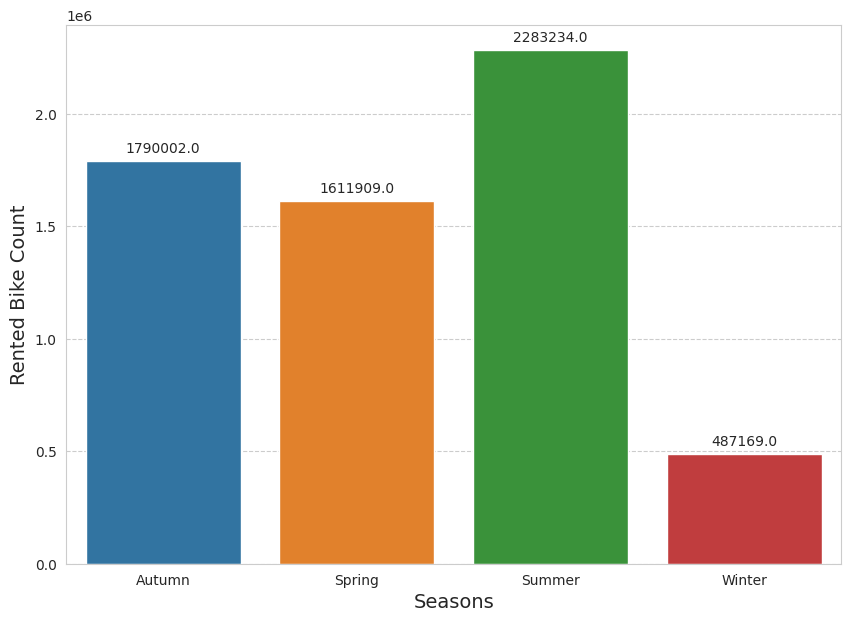

In [258]:
# Chart - 1 visualization code
#Creating a visualisation for the seasons column
plt.figure(figsize=(10,7))
splot = sns.barplot(data=seasons_col,x='Seasons',y='Rented_Bike_Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Seasons", size=14)
plt.ylabel("Rented_Bike_Count", size=14)
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots are a useful visualization tool for showing the distribution of categorical or discrete data and the comparisons between different categories or groups. ,a simple bar chart can be used to display the counts or frequencies of each category.

##### 2. What is/are the insight(s) found from the chart?

As we can see that summer has the highest number of bikes rented, This could be because of the vacation mood created in summer and also the increase in the number of tourists. Winter however is the season where the least number of bikes are rented

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes,the gained insights help creating a positive business impact

#### Chart - 2

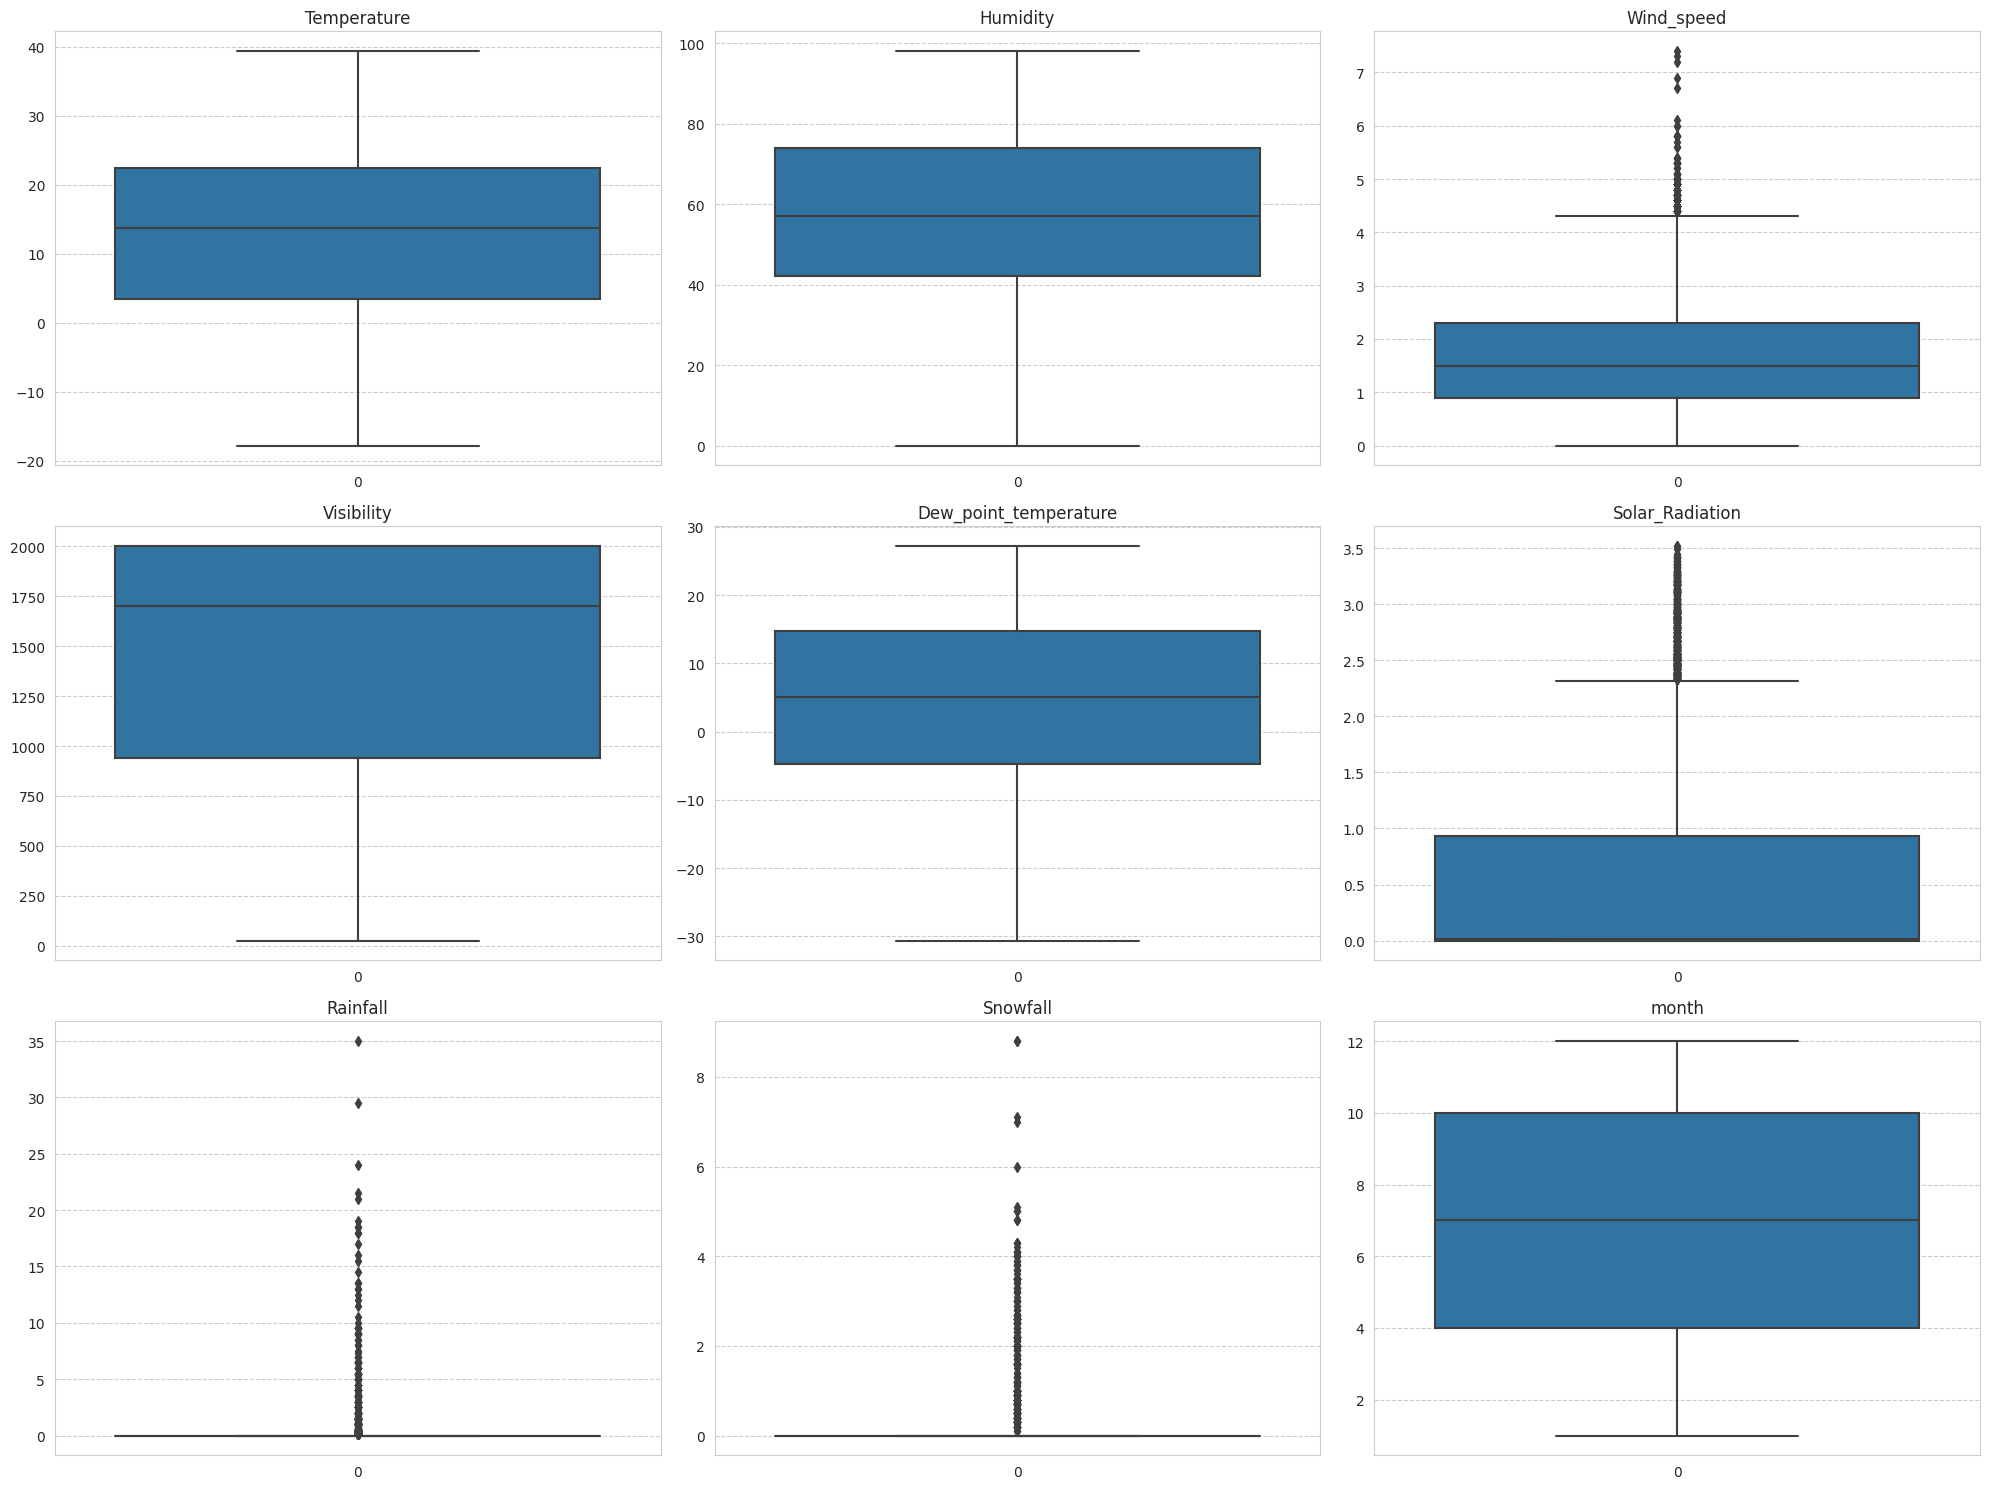

In [264]:
# Chart - 2 visualization code
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))
for i in numeric_features.columns[1:10]:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()


In [265]:
#Creating a list of columns that contains outliers
outlier_cols = ['Rainfall','Wind_speed','Snowfall','Solar_Radiation']
outlier_cols

['Rainfall', 'Wind_speed', 'Snowfall', 'Solar_Radiation']

In [266]:
#Finding the inter-quartile range for the columns with outliers
Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3-Q1
IQR

Rainfall           0.00
Wind_speed         1.40
Snowfall           0.00
Solar_Radiation    0.93
dtype: float64

In [267]:
#Calculating the upper and lower fence for outlier removal
u_fence = Q3 + (1.5*IQR)
l_fence = Q1 - (1.5*IQR)

In [268]:
#Detecting and removing the outliers
df[outlier_cols] = df[outlier_cols][~((df[outlier_cols] < l_fence) | (df[outlier_cols] > u_fence))]

In [269]:
#Checking the number of outliers deleted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   object 
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8599 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8119 non-null   float64
 8   Rainfall               8232 non-null   float64
 9   Snowfall               8317 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  Day                    8760 non-null   object 
 15  Week

In [270]:
#Creating a function to impute the null values created by outlier handling.
def impute_null(outlier_cols):
  for col in outlier_cols:
    df[col].fillna(df[col].median(),inplace=True)

In [271]:
#Calling the imputing function
impute_null(outlier_cols)

In [272]:
#Checking if the imputation is successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   object 
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  Day                    8760 non-null   object 
 15  Week

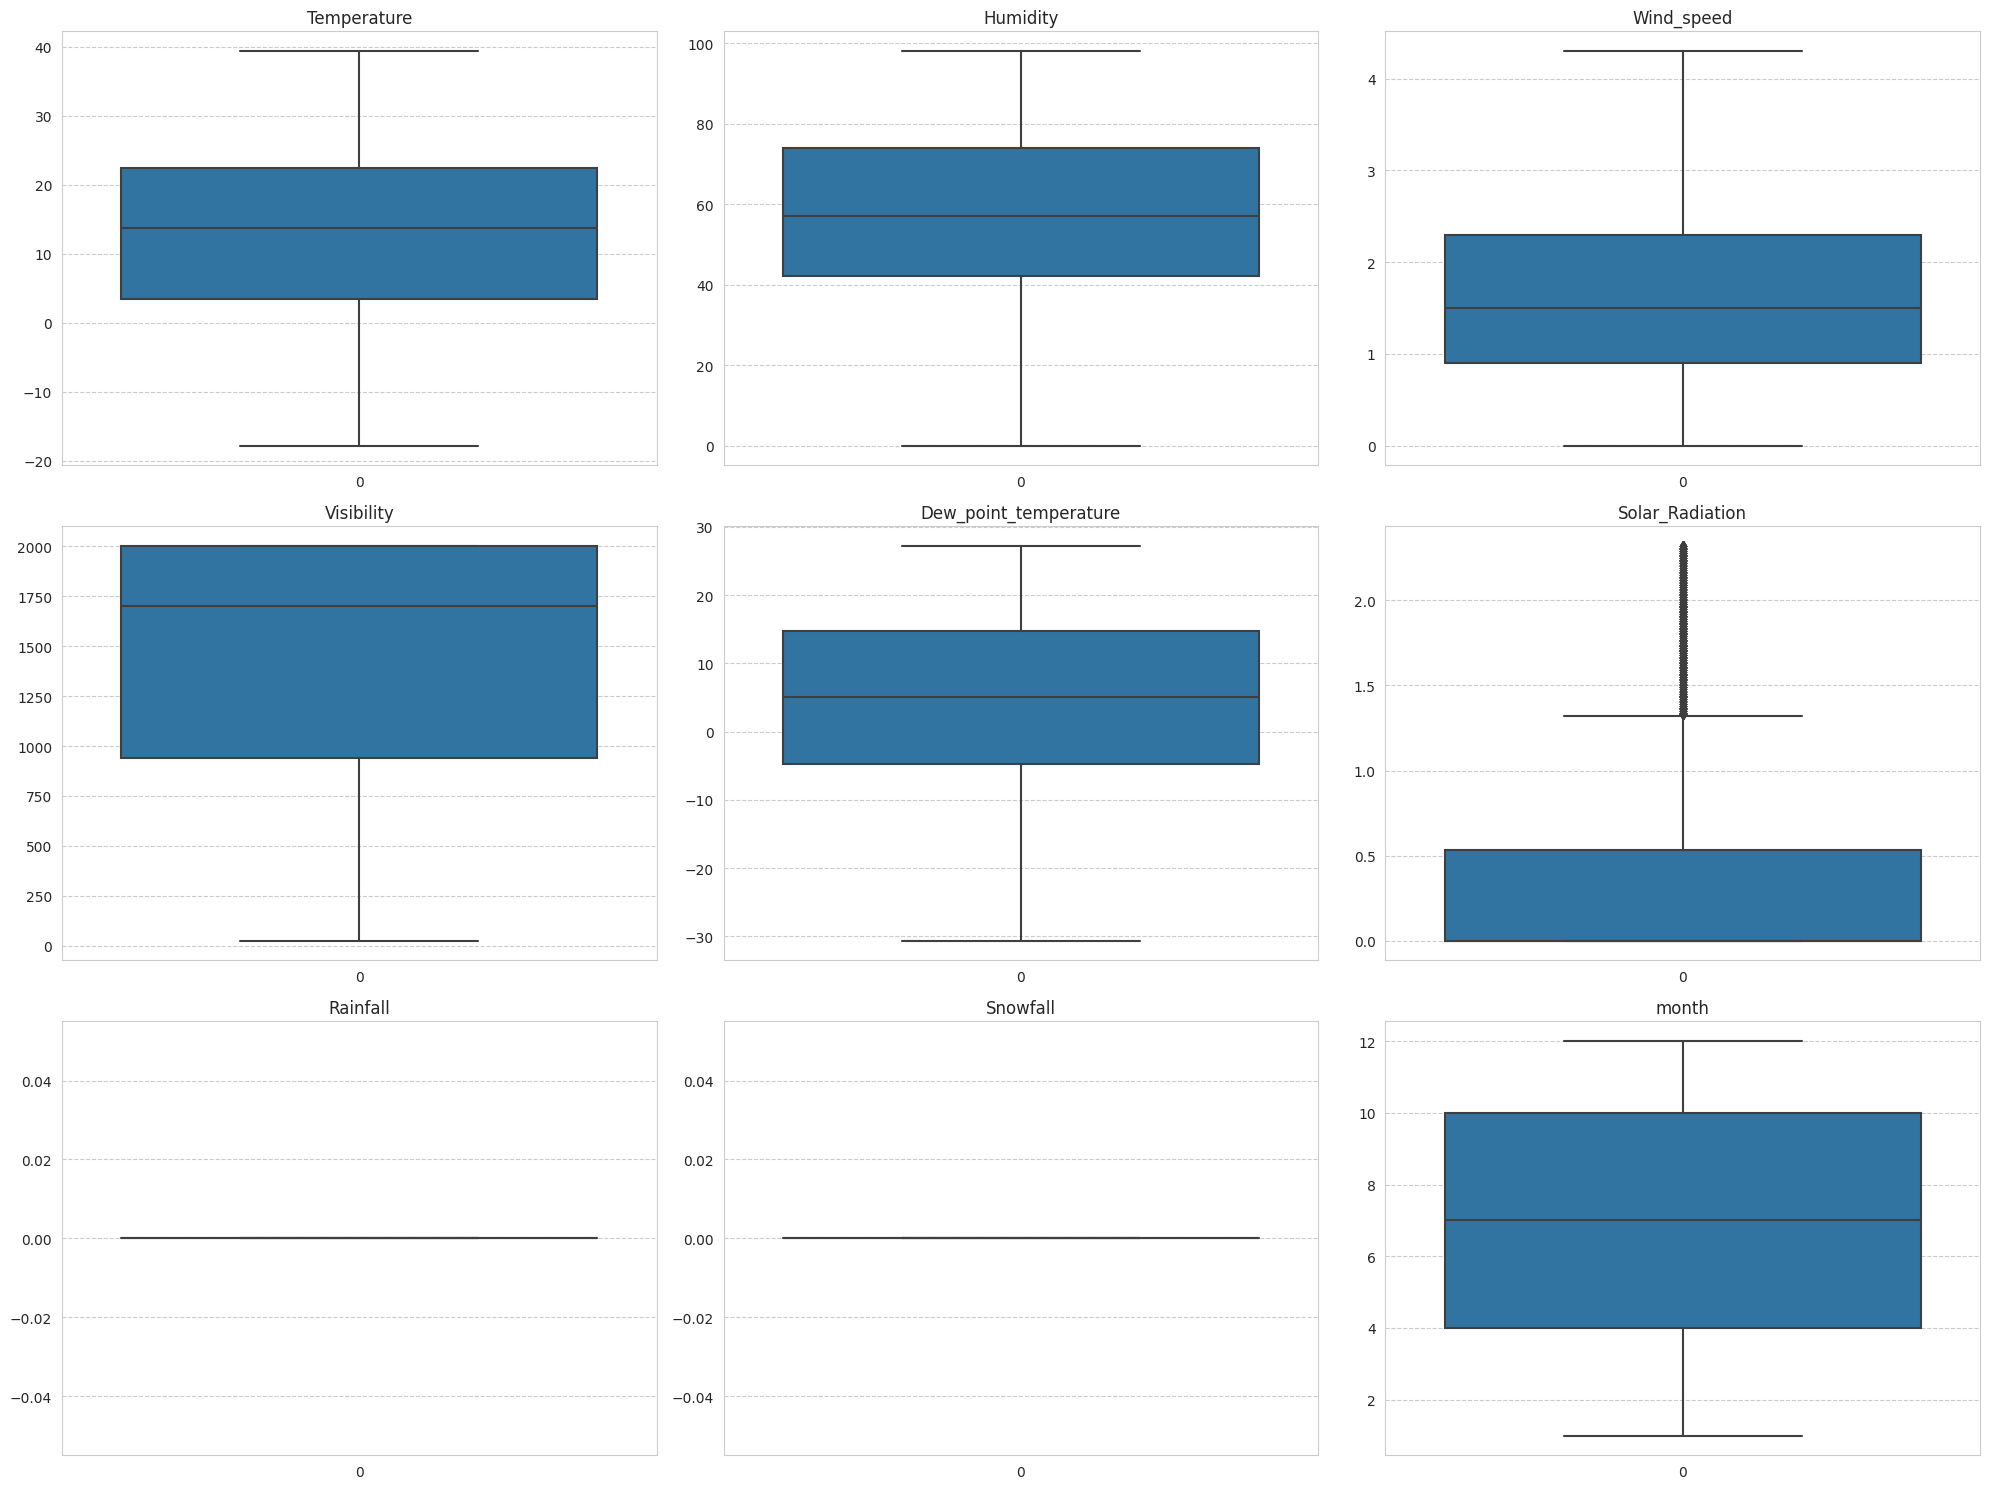

In [273]:
n = 1
plt.figure(figsize=(20,15))
for i in numeric_features.columns[1:10]:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Box plots are a popular method for detecting outliers in continuous data because they provide a visual representation of the distribution of the data, including its median, quartiles, and any outliers

##### 2. What is/are the insight(s) found from the chart?






1.   Here we can see that the columns that contain outliers are Rainfall, Snowfall, Windspeed and Solar Radiation.
2.   Due to outlier deletion, some null values have been created in these 4 columns.Now, we can either delete the observations with null values or impute them with some meaning full values. In this case I will be imputing them with the median value of each column.
3.The imputation is successful and therefore we have handled the outliers successfully



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [274]:
# Chart - 4 visualization code
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [275]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Dew point temperature(°C)'] ]])

variables        VIF
0       Rented_Bike_Count   3.530158
1             Temperature  26.485402
2                Humidity   6.285985
3              Wind_speed   4.840811
4              Visibility   8.767625
5   Dew_point_temperature  14.151609
6         Solar_Radiation   1.715722
7                Rainfall        NaN
8                Snowfall        NaN
9                   month   4.707688
10    Weekdays_or_weekend        inf
11       weekdays_weekend        inf

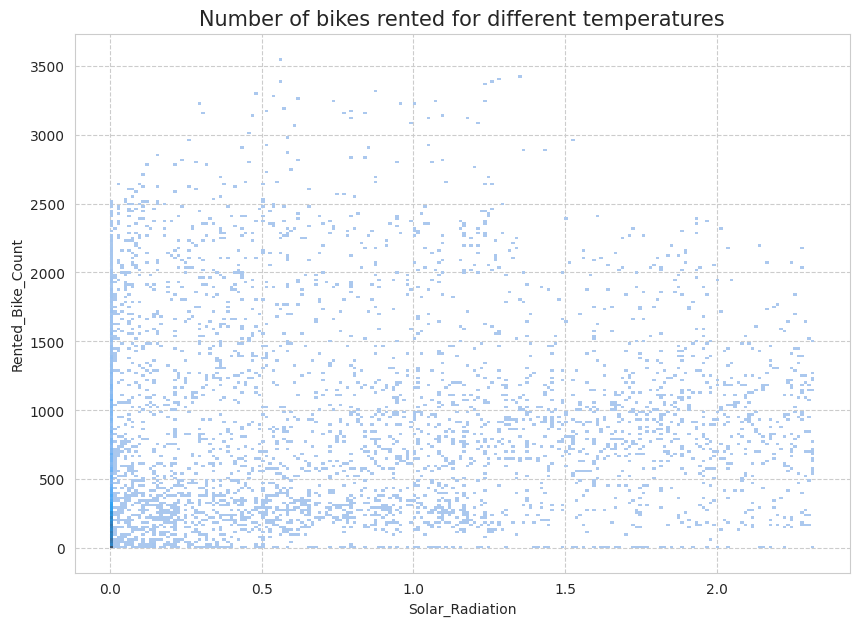

In [279]:
#Creating a visualisation for different temperatures
plt.figure(figsize=(10,7))
sns.histplot(data=df,x= 'Solar_Radiation',y='Rented_Bike_Count',bins=200)
plt.title('Number of bikes rented for different temperatures',size=15)
plt.show()

##### 1. Why did you pick the specific chart?

Histplot provides a straightforward way to visualize the distribution of numerical data by creating a histogram, which represents the frequency or density of data points in predefined intervals or bins.

##### 2. What is/are the insight(s) found from the chart?

As we can see that the most number of bikes rented are in the temperature range of 15 degrees to 30 degrees.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [281]:
#Creating a dataframe to analyse the number of bikes rented for different intensities of snowfall
snowfall_bike = create_df_analysis('Snowfall')
snowfall_bike.head()

Snowfall  Rented_Bike_Count
0       0.0            6172314

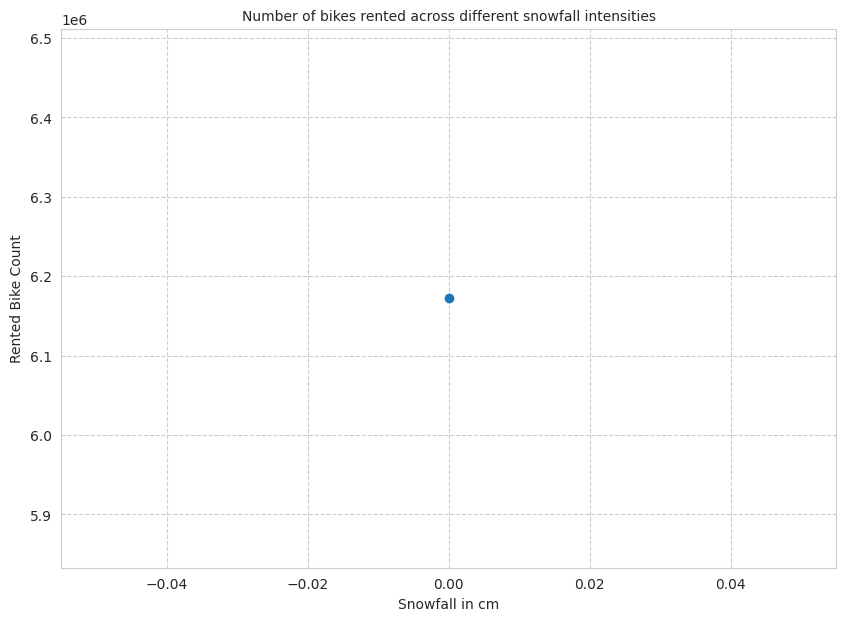

In [282]:
# Chart - 5 visualization code
#Creating a visualisation for different snowfall intensities
plt.figure(figsize=(10,7))
plt.scatter(data=snowfall_bike,x='Snowfall',y='Rented_Bike_Count')
plt.title('Number of bikes rented across different snowfall intensities',size=10)
plt.xlabel('Snowfall in cm')
plt.ylabel('Rented_Bike_Count')
plt.show()

In [283]:
#Creating a dataframe to analyse the number of bikes rented for different intensities of rainfall
rainfall_bike = create_df_analysis('Rainfall')
rainfall_bike.head()

Rainfall  Rented_Bike_Count
0       0.0            6172314

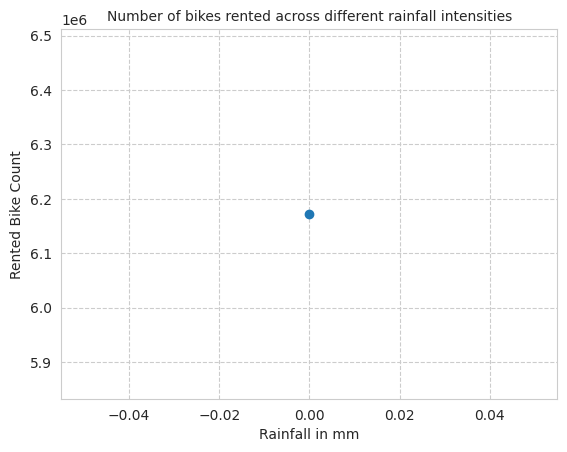

In [284]:
#Creating a visualisation for different rainfall intensities

plt.scatter(data=rainfall_bike,x='Rainfall',y='Rented_Bike_Count')
plt.title('Number of bikes rented across different rainfall intensities',size=10)
plt.xlabel('Rainfall in mm')
plt.ylabel('Rented_Bike_Count')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots are effective for examining the relationship between two continuous variables. They can reveal patterns, trends, clusters, or correlations between the variables, providing insights into the nature of their association.

##### 2. What is/are the insight(s) found from the chart?

We can see here that most of the bikes are rented when there is no snowfall at all. A similar result is seen for rainfall too, i.e the most number of bikes are rented when there is no rainfall.

Note:The y axis in both the case is of the order 10 to the power 6, therefore the lower values are not too distinctive.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

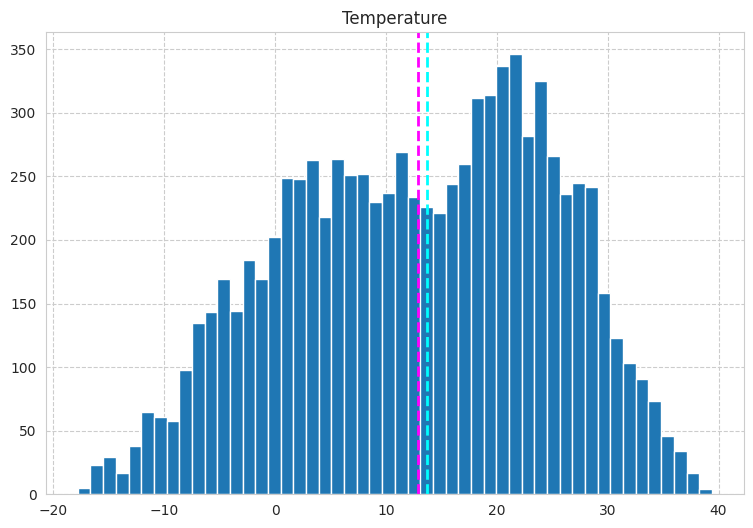

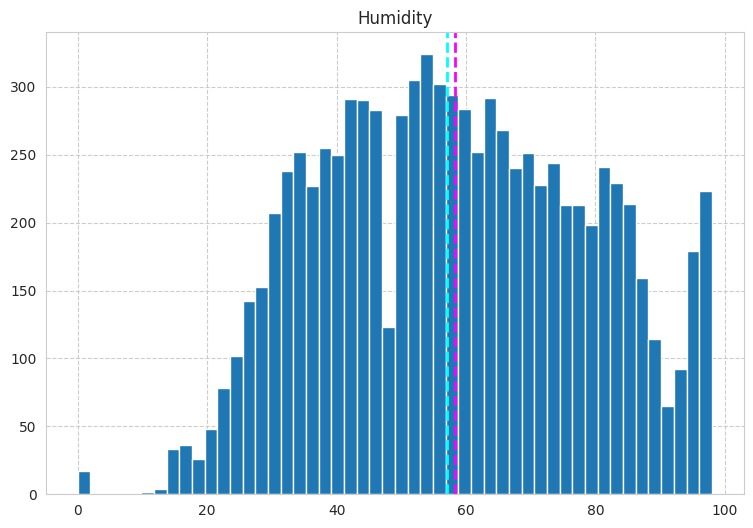

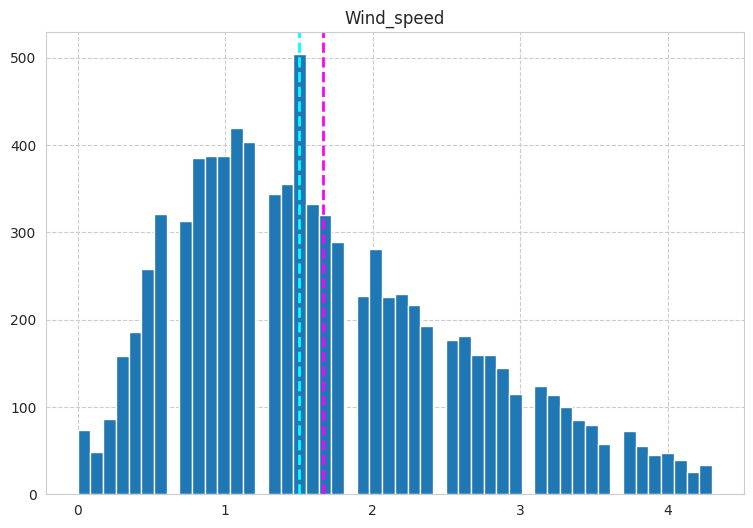

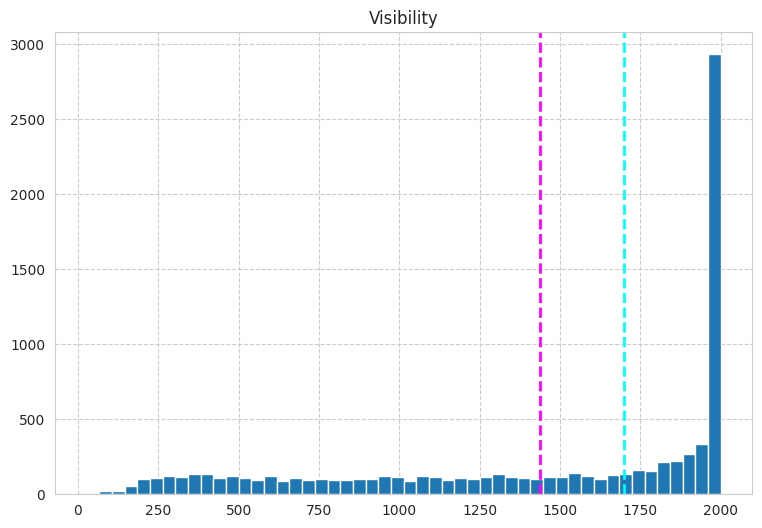

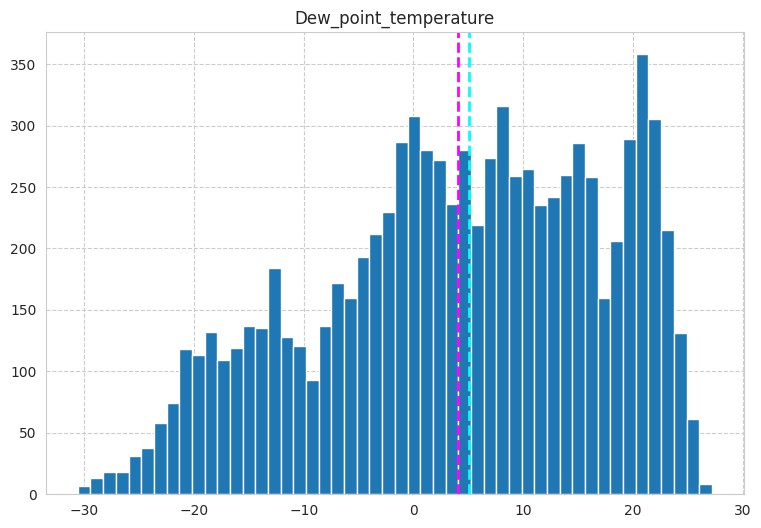

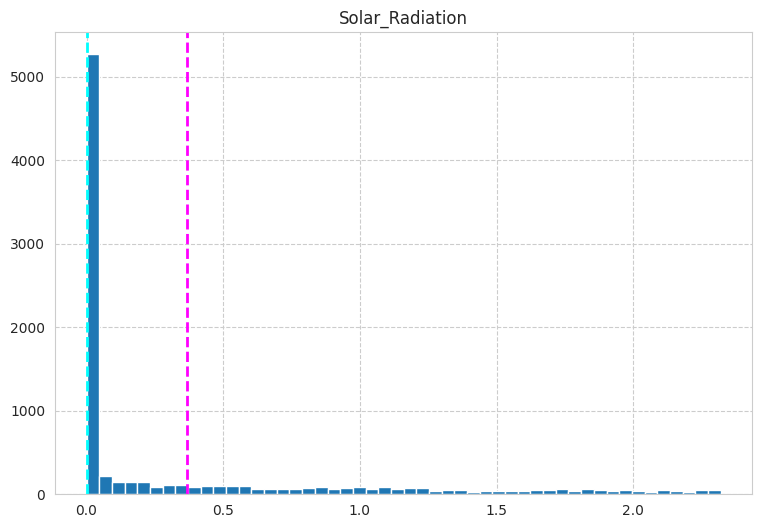

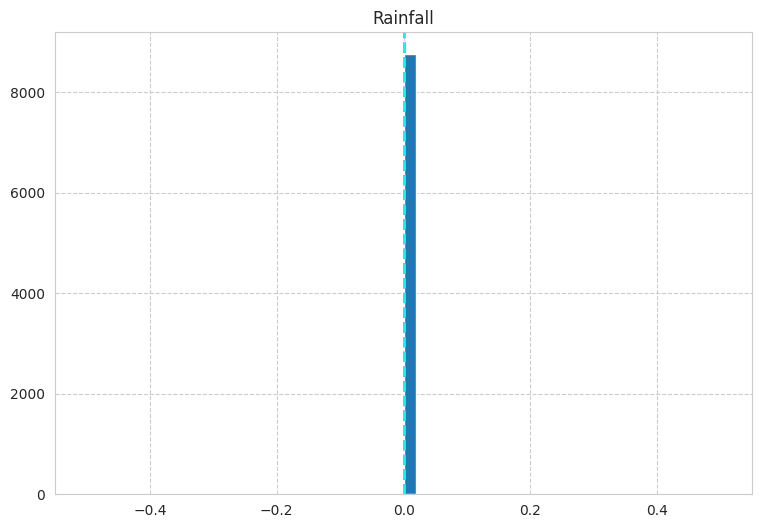

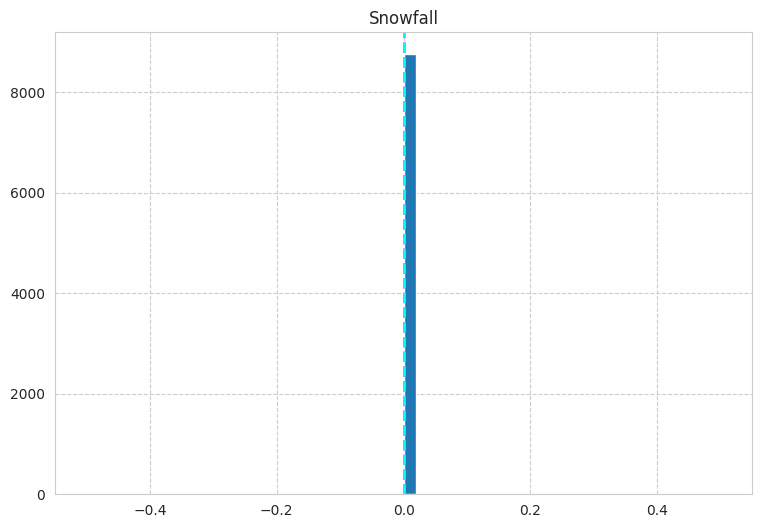

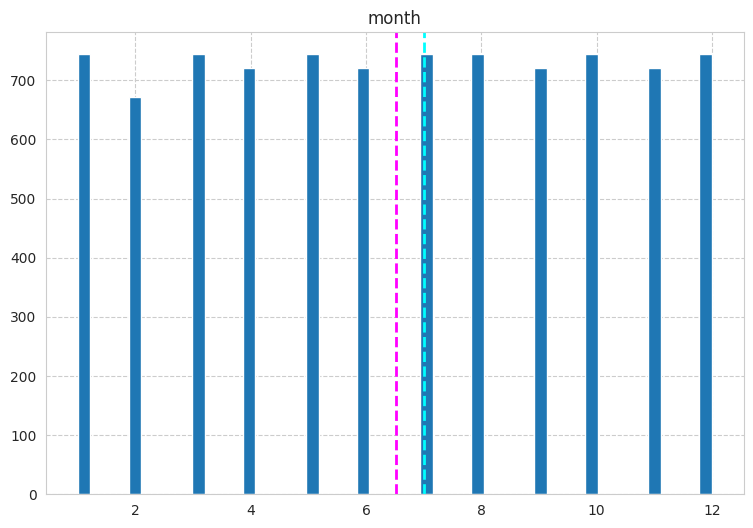

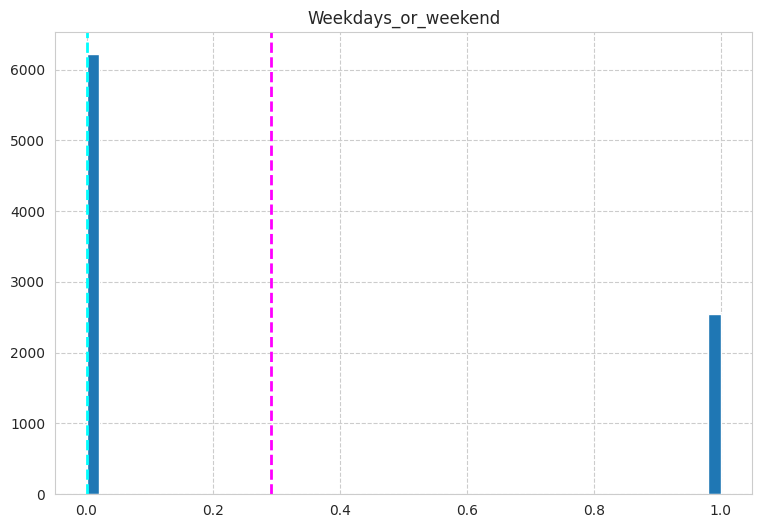

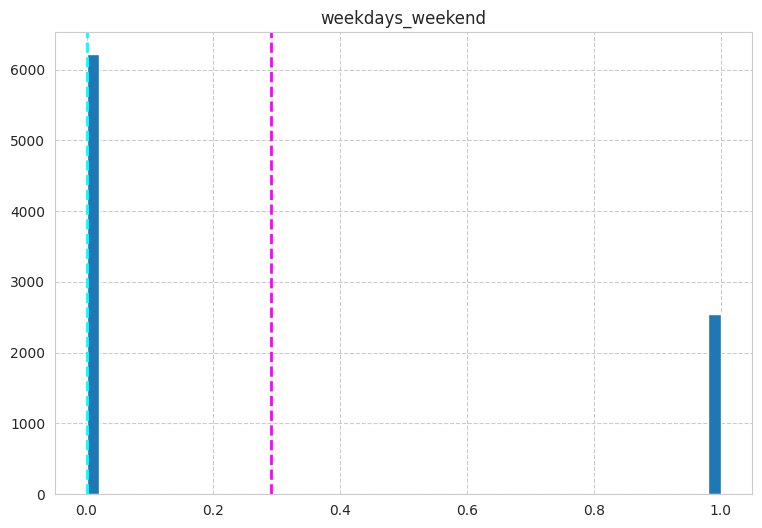

In [285]:
# Chart - 6 visualization code
#plotting histogram

for col in numeric_features.columns[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

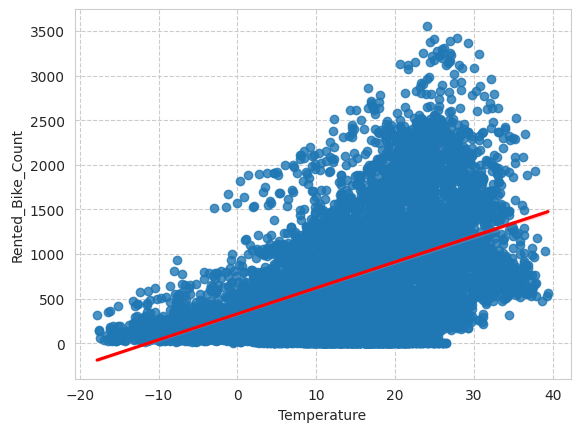

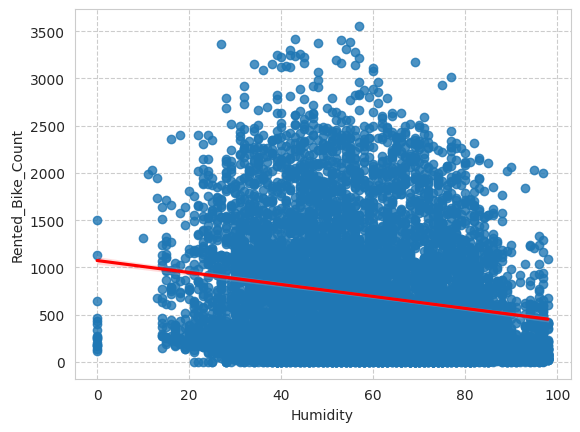

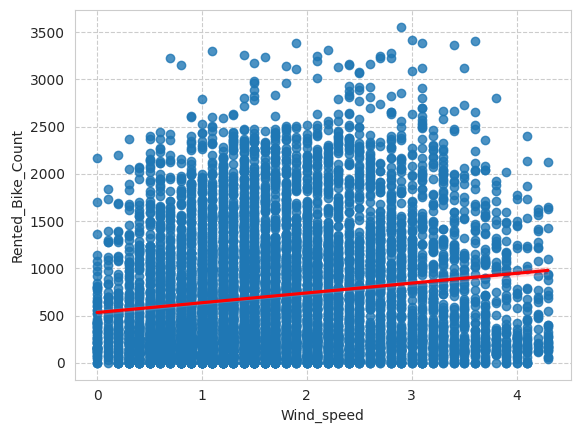

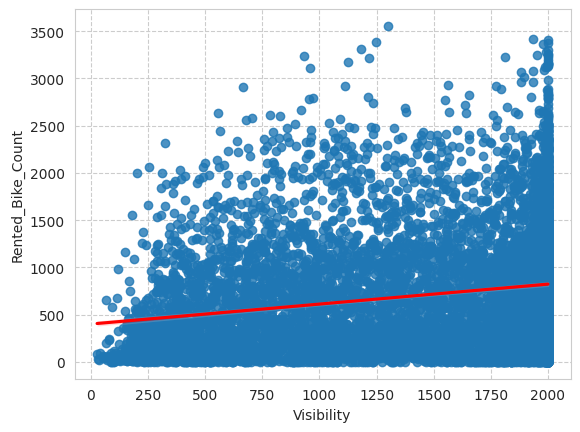

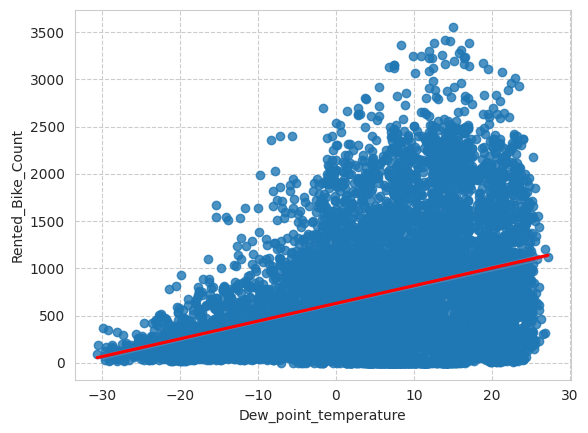

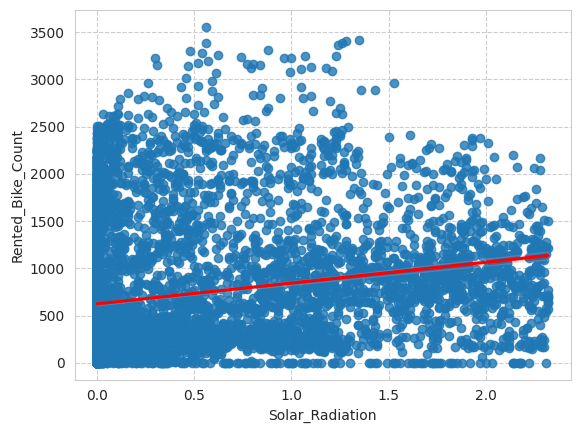

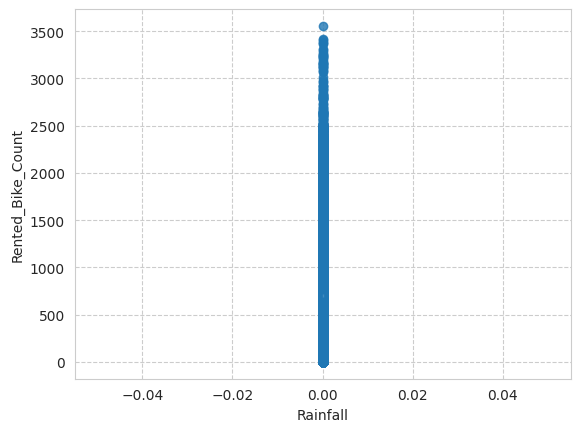

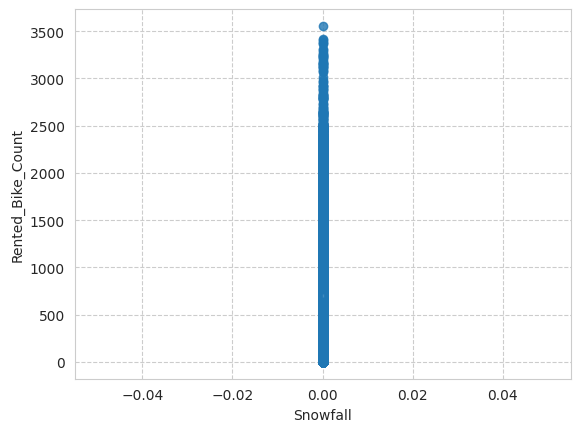

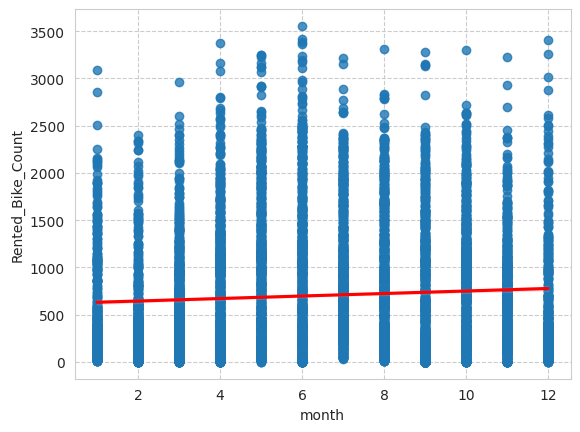

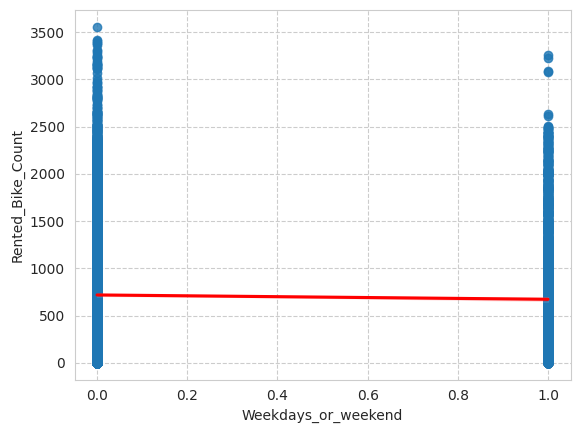

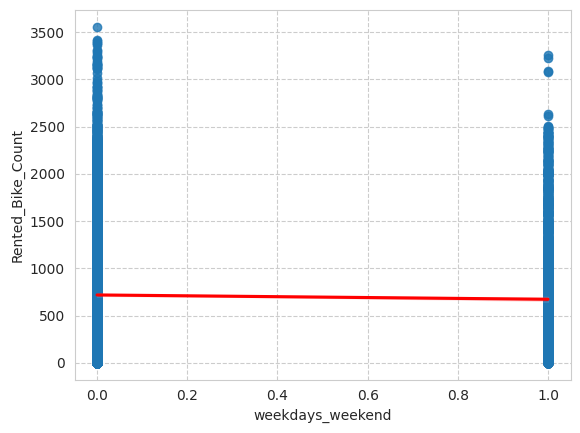

In [286]:
# Chart - 7 visualization code
# ploting Regression plot of each columns of dataset v/s Rented_Bike_Count columns

for col in numeric_features.columns[1:]:
  if col == 'Rented_Bike_Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented_Bike_Count"],line_kws={"color": "red"})
  
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We can see that all the  columns that we have, have a linear relationship with the dependent variable. So we have satisfied the assumption and therefore we are good to go.


**Hour**


1)There is sudden peak between 6/7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.

2) Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.

3) We can say that,from morning 7 AM to Evening 7 PM we have good Bike Rent Count. and from 7 PM to 7 AM Bike Rent count starts declining.

**Temperature:**

1) For decrease in temperature below 0 deg celicus the bike rent count is significantly decreased because may be people dont want to ride bike in such cold temperature.

2) But for normal temperature the Bike rent count is very high.

**humidity**

1) Here its seems like humidty is inversely proportional to bike rent count. As humdity percentage is increasing there is decrease in bike rent count.

**Wind Speed:**
1) upto wind speed 4 m/s there is good bike rent count.

**Visibility**

1) It's very obivious that as visibilty increases the bike rent count also increases. Nobody would prefere to ride in low visibilty.

**Dew Point Temperature**

1)It's again the same case as of temperature. As dew temperature goes below 0 deg celcius there is less bike rent count. It looks like Dew Point temperature and Temperature columns have strong colinarity.

**Solar radiation**

1)Here the amount of rented bikes is huge, when there is solar radiation.

**Rainfall And snowfall**

1) Its very obivious that people usually do not like ride bikes in rain and snowfall

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

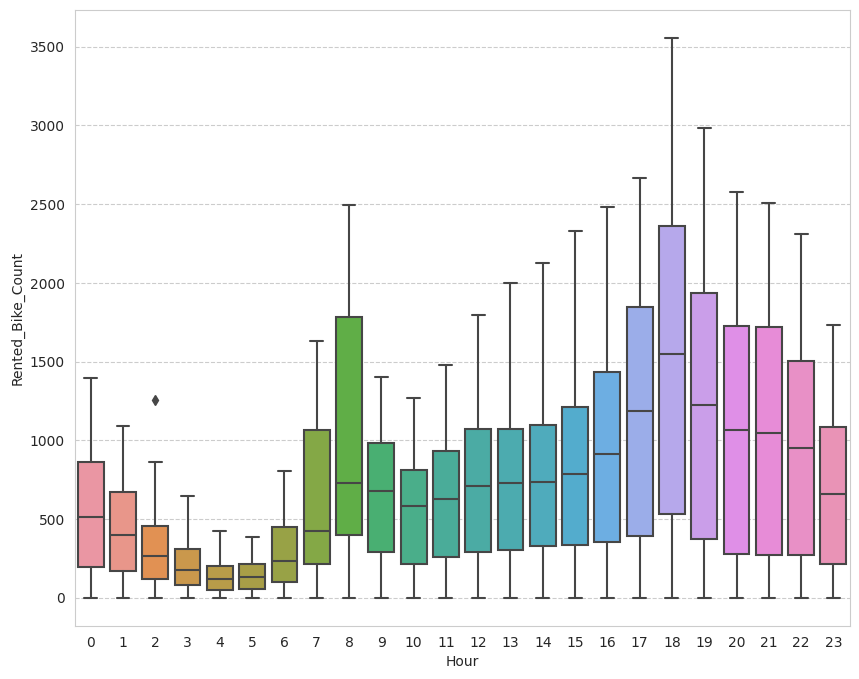

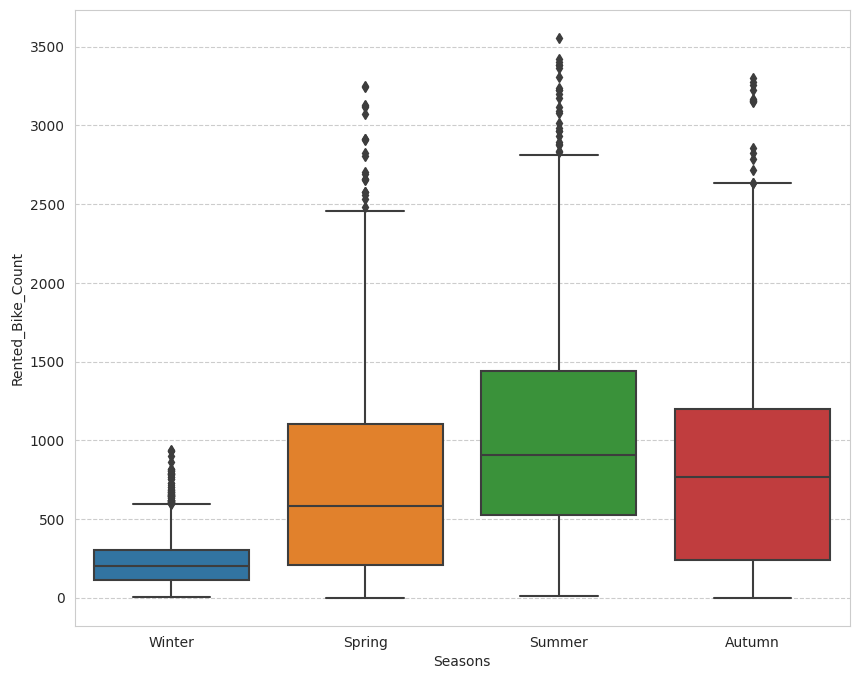

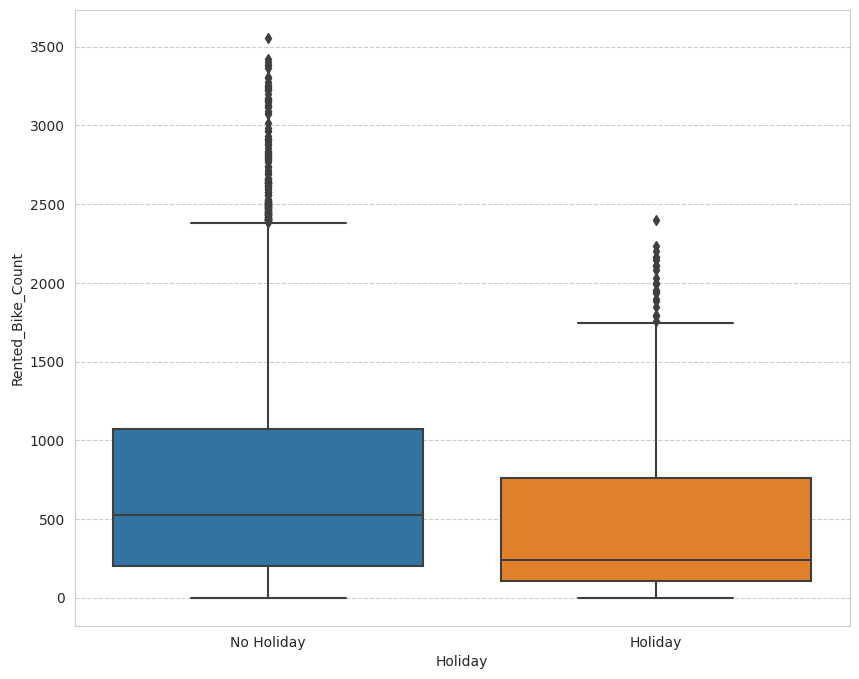

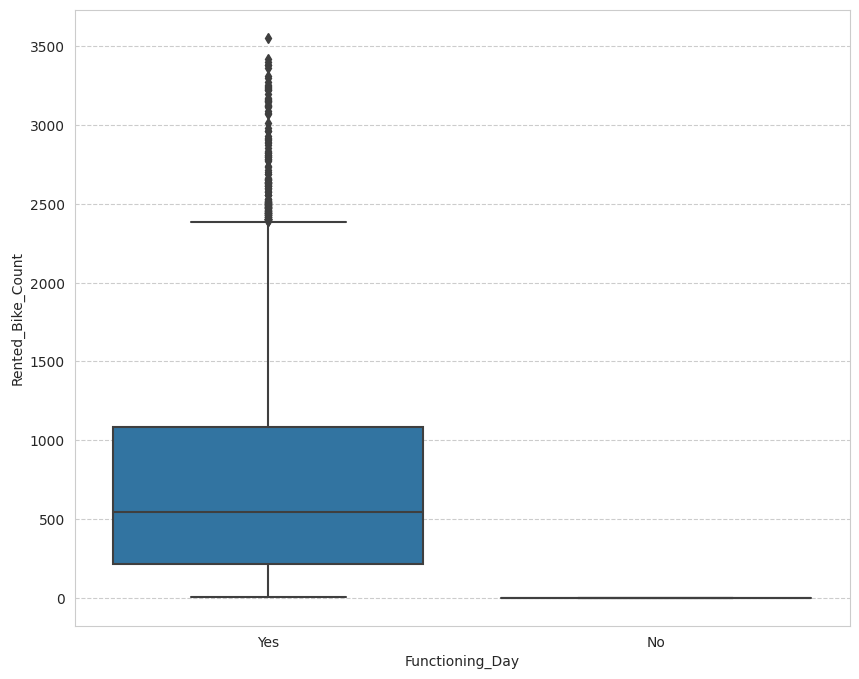

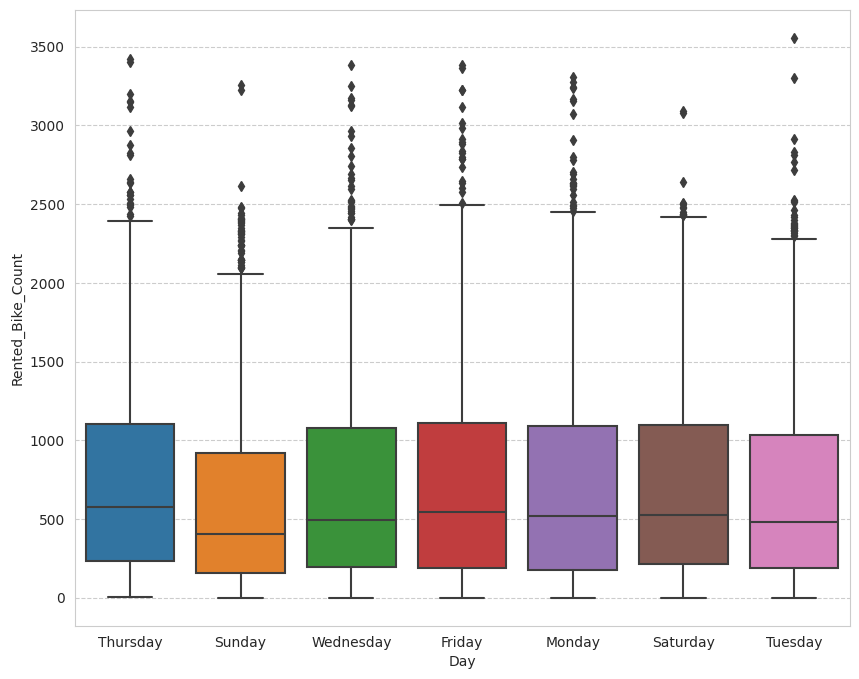

In [287]:
# Chart - 8 visualization code
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented_Bike_Count"])
  plt.show()

In [288]:
categorical_features.columns


Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Day'], dtype='object')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [289]:
#checking counts of functioning day
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

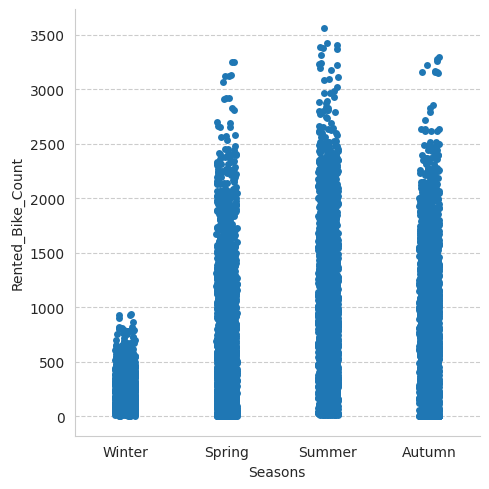

In [290]:
# Chart - 9 visualization code
#ploting cat plot for more info
sns.catplot(x='Seasons',y='Rented_Bike_Count',data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

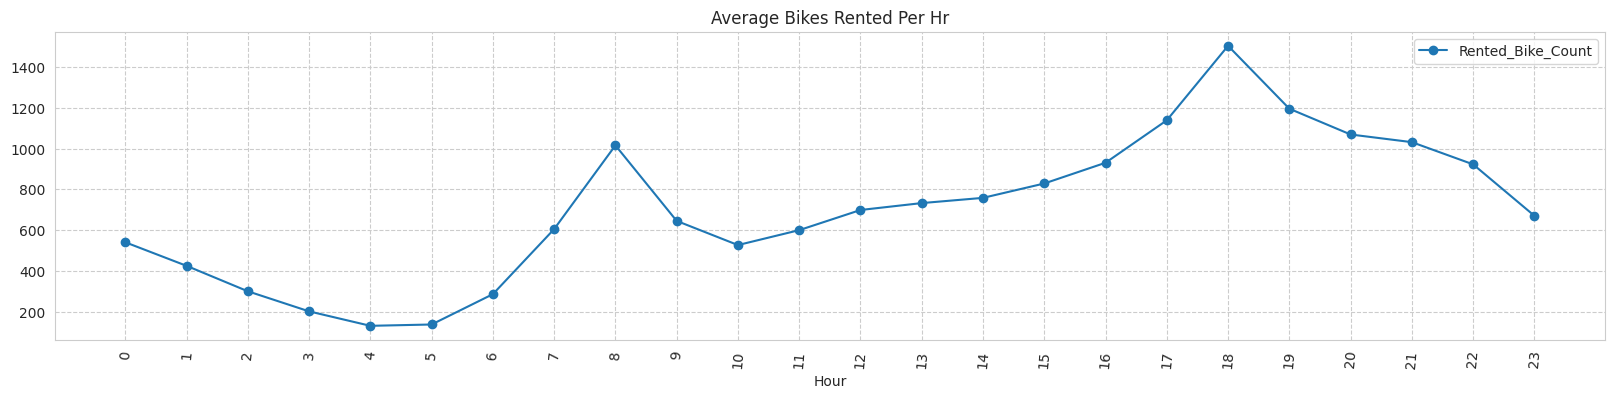

In [291]:
# Chart - 10 visualization code
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented_Bike_Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

Text(0.5, 1.0, 'Bike Retal Trend according to Hour on Holiday / No Holiday')

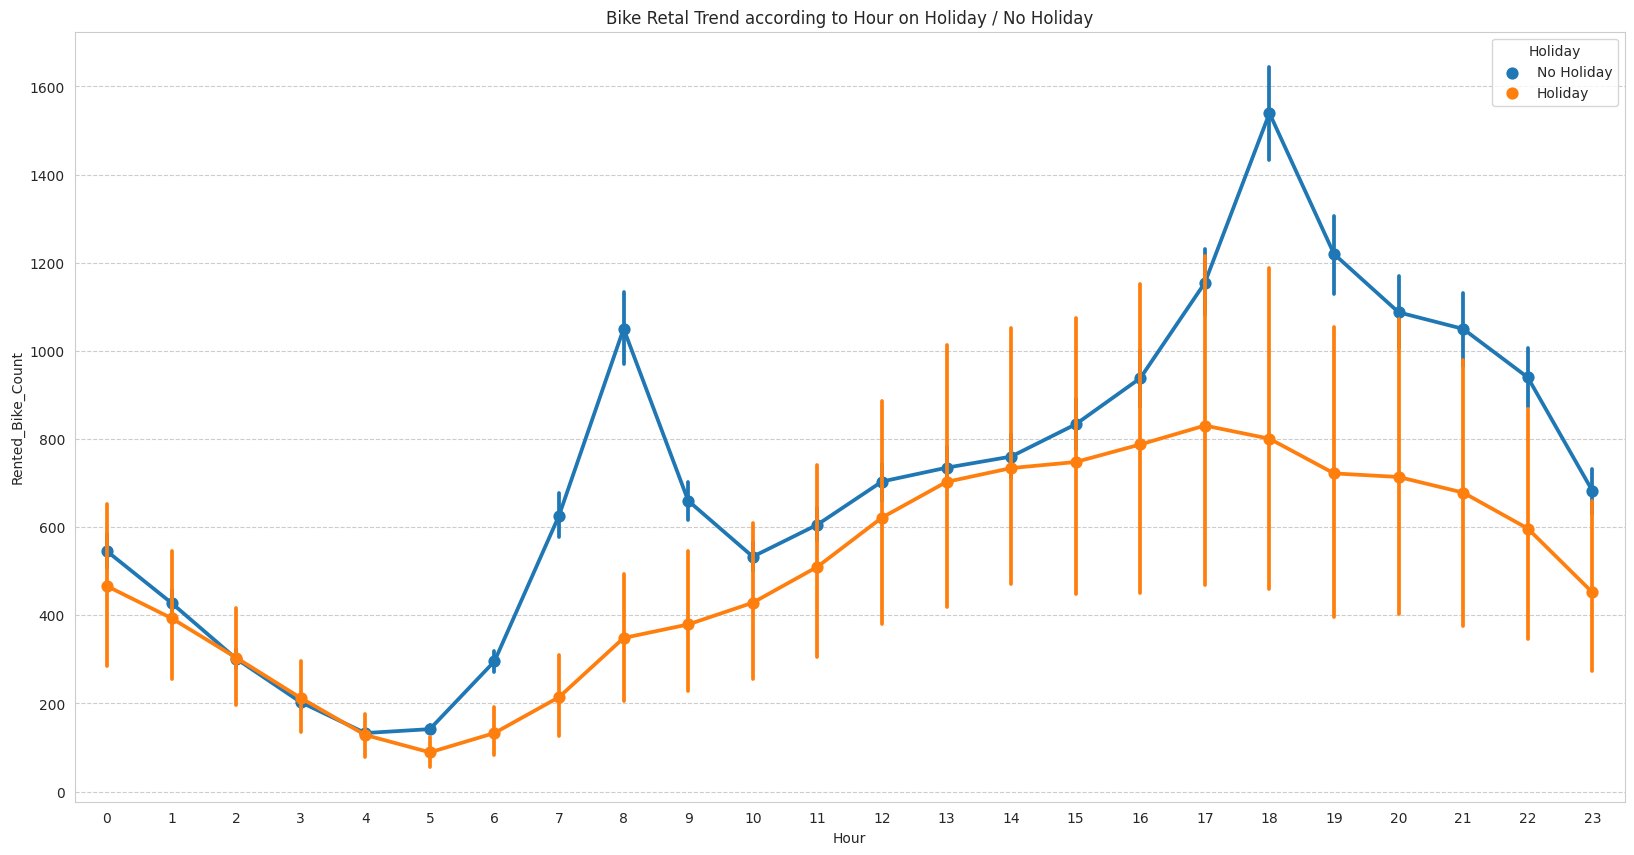

In [376]:
# Bike Rental trend with respect to Hour on Holiday or No Holiday.
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Holiday'])
plt.title("Bike Retal Trend according to Hour on Holiday / No Holiday")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Rented_Bike_Count peaked at 8 and 18 hour 

1)There is sudden peak between 6/7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.( NO Holiday). But on Holiday the case is different less bike rentals happend.

2) Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.( NO Holiday)

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [292]:
categorical_features= df.select_dtypes(include='object')

In [293]:
categorical_features.columns

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Day'], dtype='object')

In [294]:
categorical_features

Hour Seasons     Holiday Functioning_Day       Day
0       0  Winter  No Holiday             Yes  Thursday
1       1  Winter  No Holiday             Yes  Thursday
2       2  Winter  No Holiday             Yes  Thursday
3       3  Winter  No Holiday             Yes  Thursday
4       4  Winter  No Holiday             Yes  Thursday
...   ...     ...         ...             ...       ...
8755   19  Autumn  No Holiday             Yes    Friday
8756   20  Autumn  No Holiday             Yes    Friday
8757   21  Autumn  No Holiday             Yes    Friday
8758   22  Autumn  No Holiday             Yes    Friday
8759   23  Autumn  No Holiday             Yes    Friday

[8760 rows x 5 columns]

In [295]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [296]:
dummy_categorical_feature

Hour_1  Hour_2  Hour_3  Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  Hour_9  \
0          0       0       0       0       0       0       0       0       0   
1          1       0       0       0       0       0       0       0       0   
2          0       1       0       0       0       0       0       0       0   
3          0       0       1       0       0       0       0       0       0   
4          0       0       0       1       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8755       0       0       0       0       0       0       0       0       0   
8756       0       0       0       0       0       0       0       0       0   
8757       0       0       0       0       0       0       0       0       0   
8758       0       0       0       0       0       0       0       0       0   
8759       0       0       0       0       0       0       0       0       0   

      Hour_10  ...  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0           0  ...               0               1                   1   
1           0  ...               0               1                   1   
2           0  ...               0               1                   1   
3           0  ...               0               1                   1   
4           0  ...               0               1                   1   
...       ...  ...             ...             ...                 ...   
8755        0  ...               0               0                   1   
8756        0  ...               0               0                   1   
8757        0  ...               0               0                   1   
8758        0  ...               0               0                   1   
8759        0  ...               0               0                   1   

      Functioning_Day_Yes  Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  \
0                       1           0             0           0             1   
1                       1           0             0           0             1   
2                       1           0             0           0             1   
3                       1           0             0           0             1   
4                       1           0             0           0             1   
...                   ...         ...           ...         ...           ...   
8755                    1           0             0           0             0   
8756                    1           0             0           0             0   
8757                    1           0             0           0             0   
8758                    1           0             0           0             0   
8759                    1           0             0           0             0   

      Day_Tuesday  Day_Wednesday  
0               0              0  
1               0              0  
2               0              0  
3               0              0  
4               0              0  
...           ...            ...  
8755            0              0  
8756            0              0  
8757            0              0  
8758            0              0  
8759            0              0  

[8760 rows x 34 columns]

In [297]:
#concating numeric columns and dummy columns and creating final df
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [298]:
#showing head of final df
final_df.head()

Hour_1  Hour_2  Hour_3  Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  Hour_9  \
0       0       0       0       0       0       0       0       0       0   
1       1       0       0       0       0       0       0       0       0   
2       0       1       0       0       0       0       0       0       0   
3       0       0       1       0       0       0       0       0       0   
4       0       0       0       1       0       0       0       0       0   

   Hour_10  ...  Humidity  Wind_speed  Visibility  Dew_point_temperature  \
0        0  ...        37         2.2        2000                  -17.6   
1        0  ...        38         0.8        2000                  -17.6   
2        0  ...        39         1.0        2000                  -17.7   
3        0  ...        40         0.9        2000                  -17.6   
4        0  ...        36         2.3        2000                  -18.6   

   Solar_Radiation  Rainfall  Snowfall  month  Weekdays_or_weekend  \
0              0.0       0.0       0.0      1                    0   
1              0.0       0.0       0.0      1                    0   
2              0.0       0.0       0.0      1                    0   
3              0.0       0.0       0.0      1                    0   
4              0.0       0.0       0.0      1                    0   

   weekdays_weekend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 46 columns]

In [299]:
#describing final DF
final_df.describe().transpose()

count         mean         std   min    25%      50%  \
Hour_1                 8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_2                 8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_3                 8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_4                 8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_5                 8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_6                 8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_7                 8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_8                 8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_9                 8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_10                8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_11                8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_12                8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_13                8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_14                8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_15                8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_16                8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_17                8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_18                8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_19                8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_20                8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_21                8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_22                8760.0     0.041667    0.199838   0.0    0.0     0.00   
Hour_23                8760.0     0.041667    0.199838   0.0    0.0     0.00   
Seasons_Spring         8760.0     0.252055    0.434217   0.0    0.0     0.00   
Seasons_Summer         8760.0     0.252055    0.434217   0.0    0.0     0.00   
Seasons_Winter         8760.0     0.246575    0.431042   0.0    0.0     0.00   
Holiday_No Holiday     8760.0     0.950685    0.216537   0.0    1.0     1.00   
Functioning_Day_Yes    8760.0     0.966324    0.180404   0.0    1.0     1.00   
Day_Monday             8760.0     0.136986    0.343853   0.0    0.0     0.00   
Day_Saturday           8760.0     0.142466    0.349547   0.0    0.0     0.00   
Day_Sunday             8760.0     0.147945    0.355066   0.0    0.0     0.00   
Day_Thursday           8760.0     0.142466    0.349547   0.0    0.0     0.00   
Day_Tuesday            8760.0     0.145205    0.352328   0.0    0.0     0.00   
Day_Wednesday          8760.0     0.145205    0.352328   0.0    0.0     0.00   
Rented_Bike_Count      8760.0   704.602055  644.997468   0.0  191.0   504.50   
Temperature            8760.0    12.882922   11.944825 -17.8    3.5    13.70   
Humidity               8760.0    58.226256   20.362413   0.0   42.0    57.00   
Wind_speed             8760.0     1.724909    1.036300   0.0    0.9     1.50   
Visibility             8760.0  1436.825799  608.298712  27.0  940.0  1698.00   
Dew_point_temperature  8760.0     4.073813   13.060369 -30.6   -4.7     5.10   
Solar_Radiation        8760.0     0.569111    0.868746   0.0    0.0     0.01   
Rainfall               8760.0     0.148687    1.128193   0.0    0.0     0.00   
Snowfall               8760.0     0.075068    0.436746   0.0    0.0     0.00   
month                  8760.0     6.526027    3.448048   1.0    4.0     7.00   
Weekdays_or_weekend    8760.0     0.290411    0.453978   0.0    0.0     0.00   
weekdays_weekend       8760.0     0.290411    0.453978   0.0    0.0     0.00   

                           75%      max  
Hour_1                    0.00     1.00  
Hour_2                    0.00     1.00  
Hour_3                    0.00     1.00  
Hour_4                    0.00     1.00  
Hour_5                    0.00     1.00  
Hour_6     

<Figure size 2000x1600 with 0 Axes>

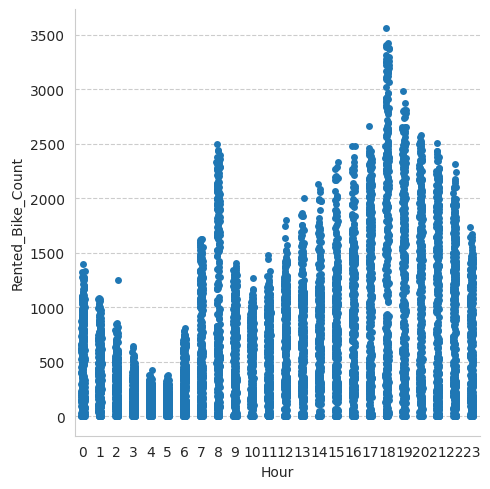

<Figure size 2000x1600 with 0 Axes>

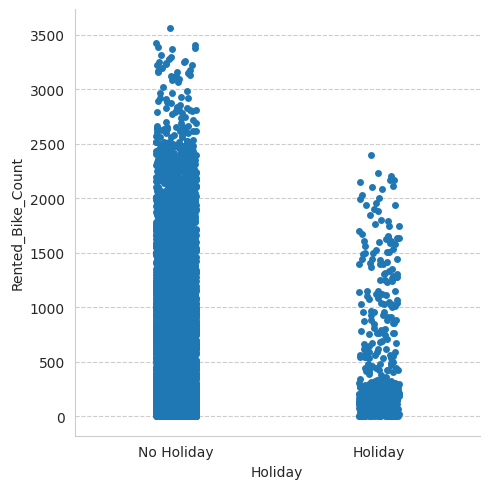

<Figure size 2000x1600 with 0 Axes>

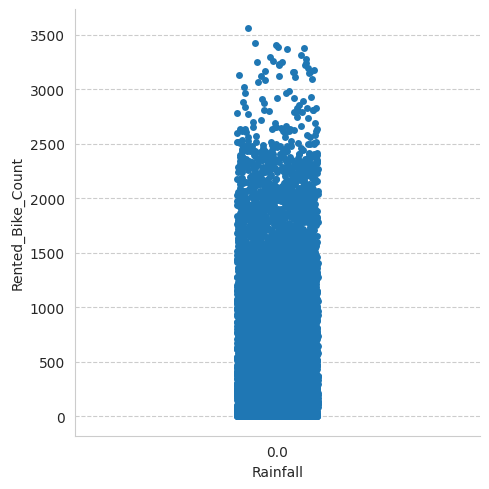

<Figure size 2000x1600 with 0 Axes>

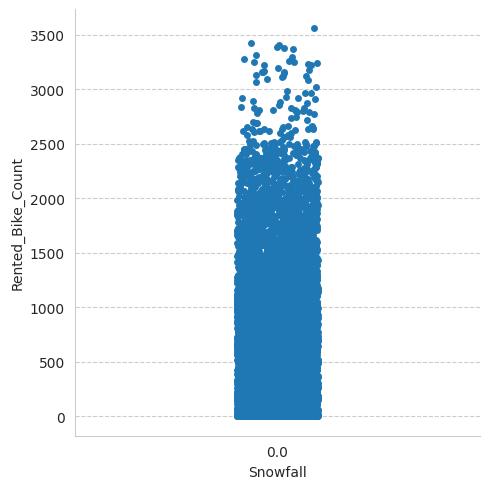

<Figure size 2000x1600 with 0 Axes>

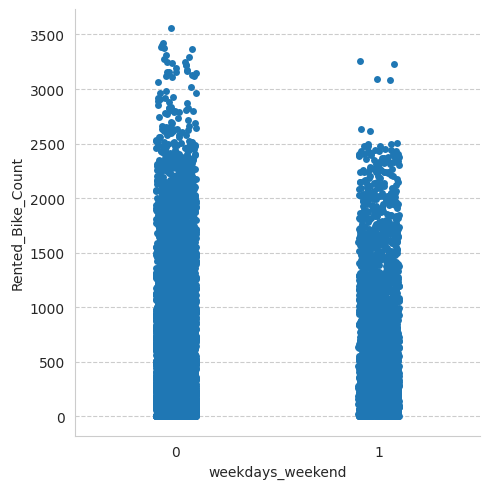

In [301]:
# Chart - 11 visualization code
# ploting cat plot on some feature to get more information

feature_list=["Hour","Holiday",'Rainfall','Snowfall','weekdays_weekend']
for feature in feature_list:
  plt.figure(figsize=(10,8),dpi=200)
  sns.catplot(x=feature,y='Rented_Bike_Count',data=df)
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

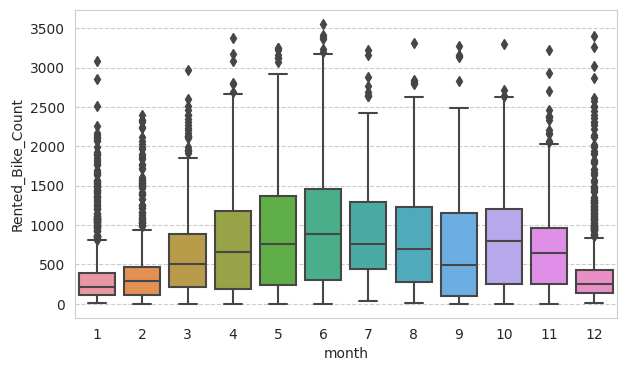

In [302]:
# Chart - 12 visualization code
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='month',y='Rented_Bike_Count',data=df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Seasons')

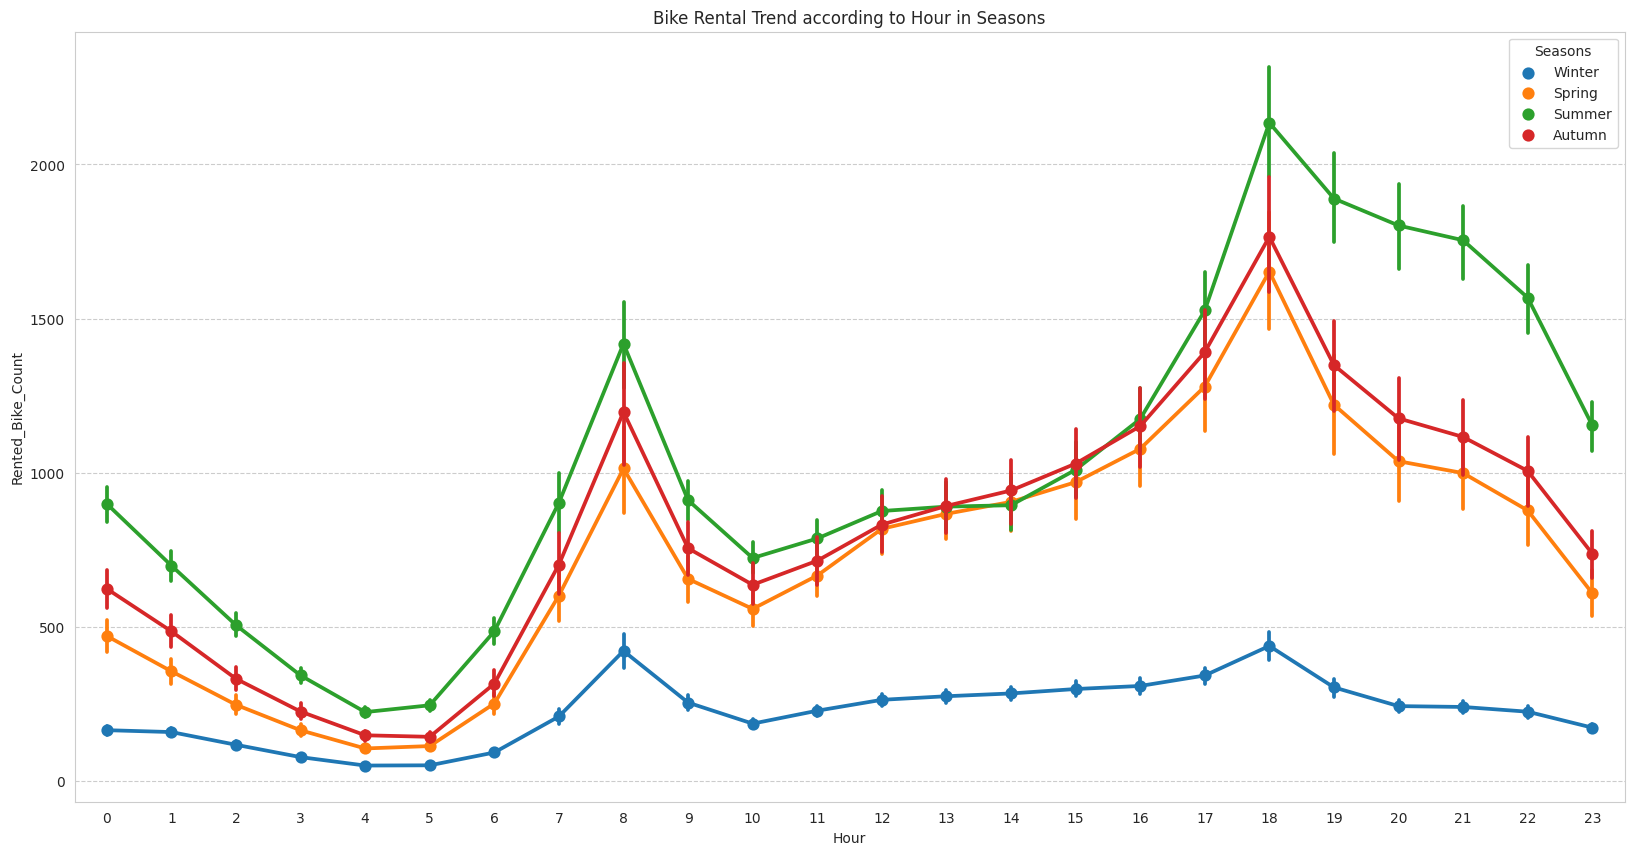

In [377]:
# Chart - 13 visualization code
## Bike Rent Count trend with respect Hours on Seasons.
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Seasons'])
plt.title("Bike Rental Trend according to Hour in Seasons")

<Axes: xlabel='Rented_Bike_Count'>

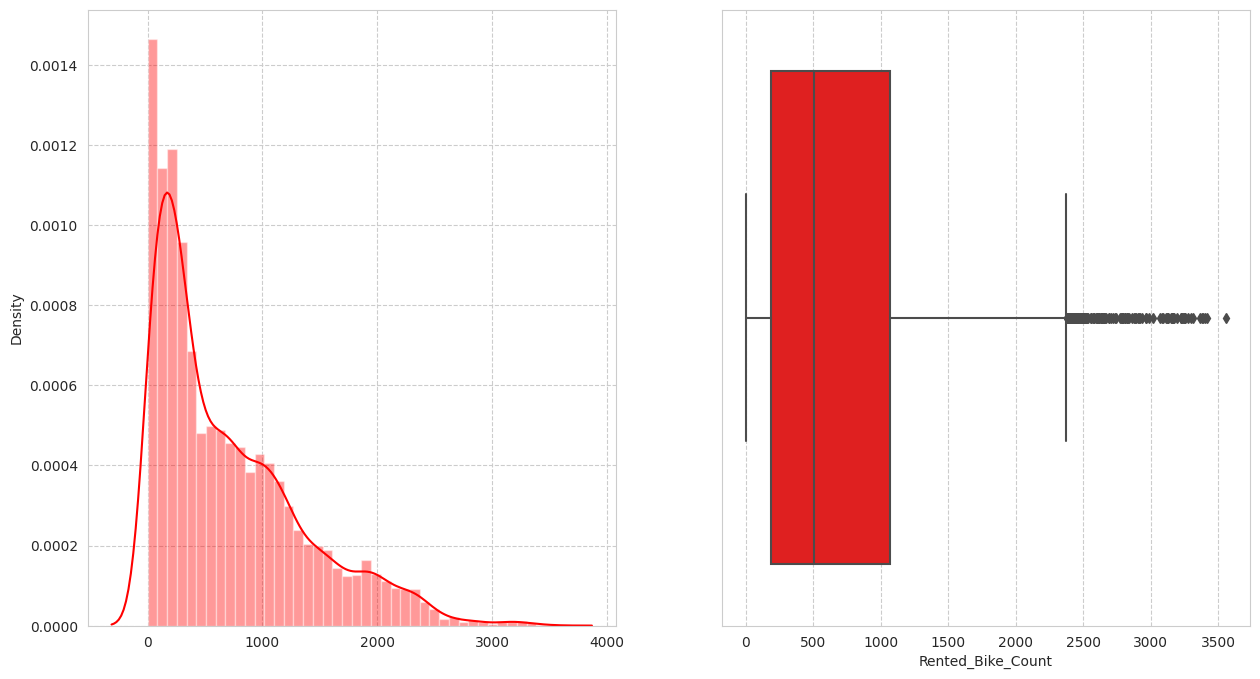

In [378]:
# plotting subplots
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=df['Rented_Bike_Count'],color='red',ax=axes[0])
# plt.figure(figsize=(15,8))
sns.boxplot(x=df['Rented_Bike_Count'],color='red',ax=axes[1])

<Axes: xlabel='Rented_Bike_Count'>

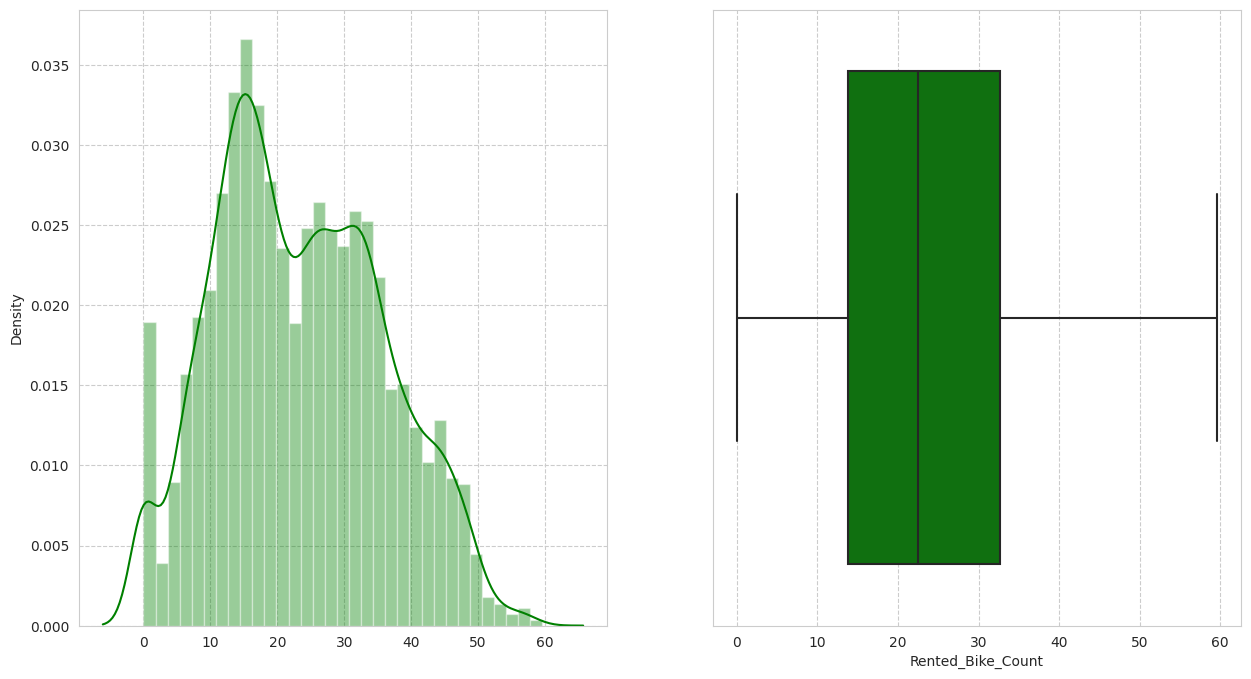

In [380]:
# Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x=np.sqrt(df['Rented_Bike_Count']),color='g',ax=axes[0])
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']),color='g',ax=axes[1])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

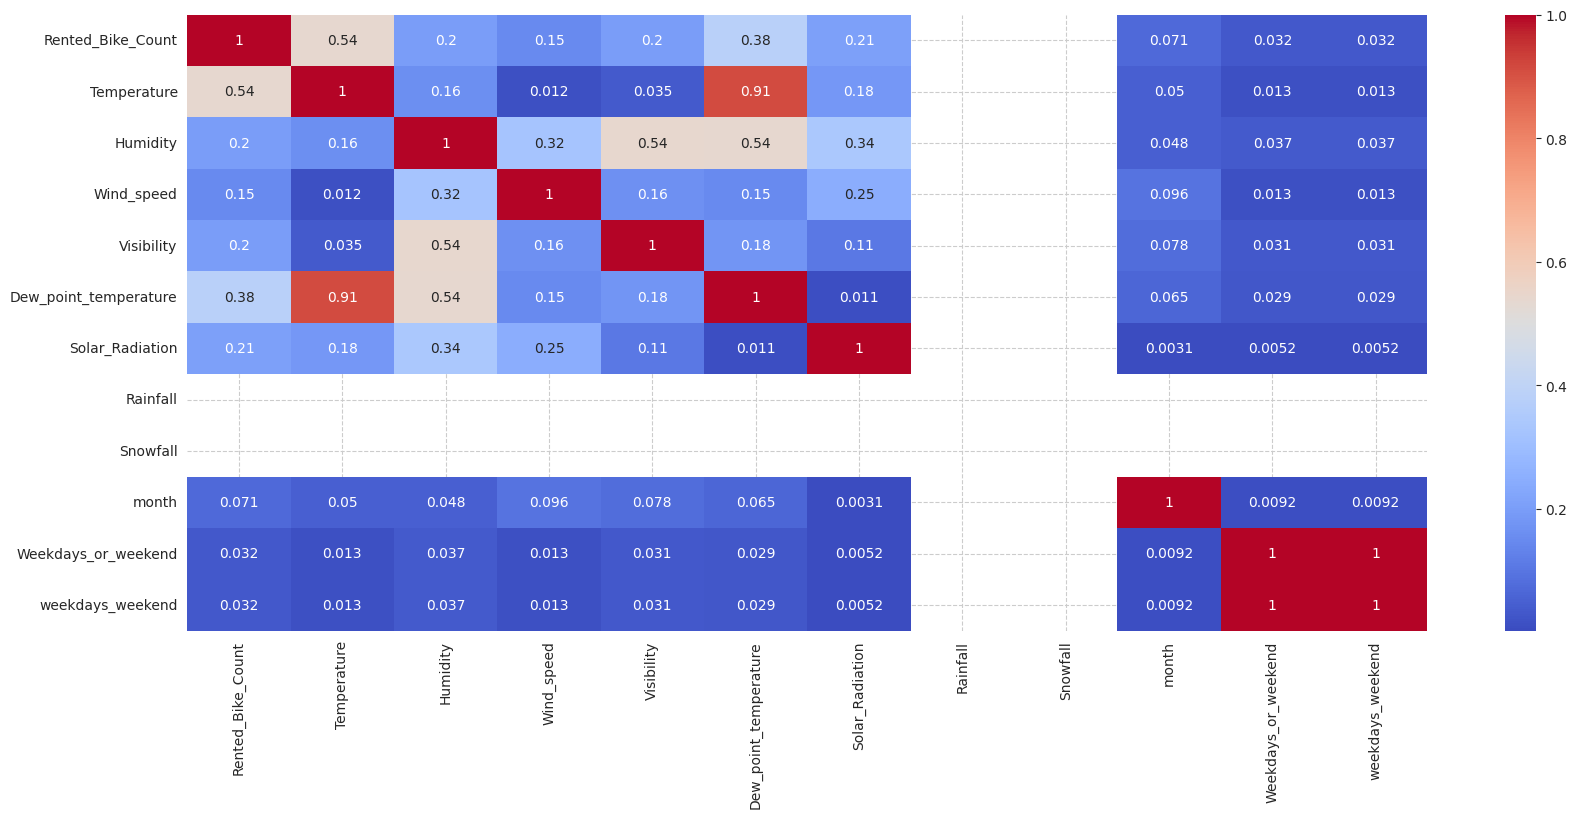

In [382]:
plt.figure(figsize=(20,8))
corr=df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

A correlation heatmap is a type of chart that is commonly used to visualize the relationship between multiple variables in a dataset.To identify the strength and direction of the relationships between variables

##### 2. What is/are the insight(s) found from the chart?

the Dew point temperature column is highly correlated to the Temperature column 

Temperature and Dew point Temperature are highly correlated.
As per our regression assumption, there should not be colinearity between independent variables.

We can see from the heatmap that "Temperature" and "Dew Point Temperature" are highly corelated. We can drop one of them.As the corelation between temperature and our dependent variable "Bike Rented Count" is high. So we will Keep the Temperature column and drop the "Dew Point Temperature" column.

And also we dropping "Date" column as its not useful for us(as we have created the month, weekdays and weekend columns.

#### Chart - 15 - Pair Plot 

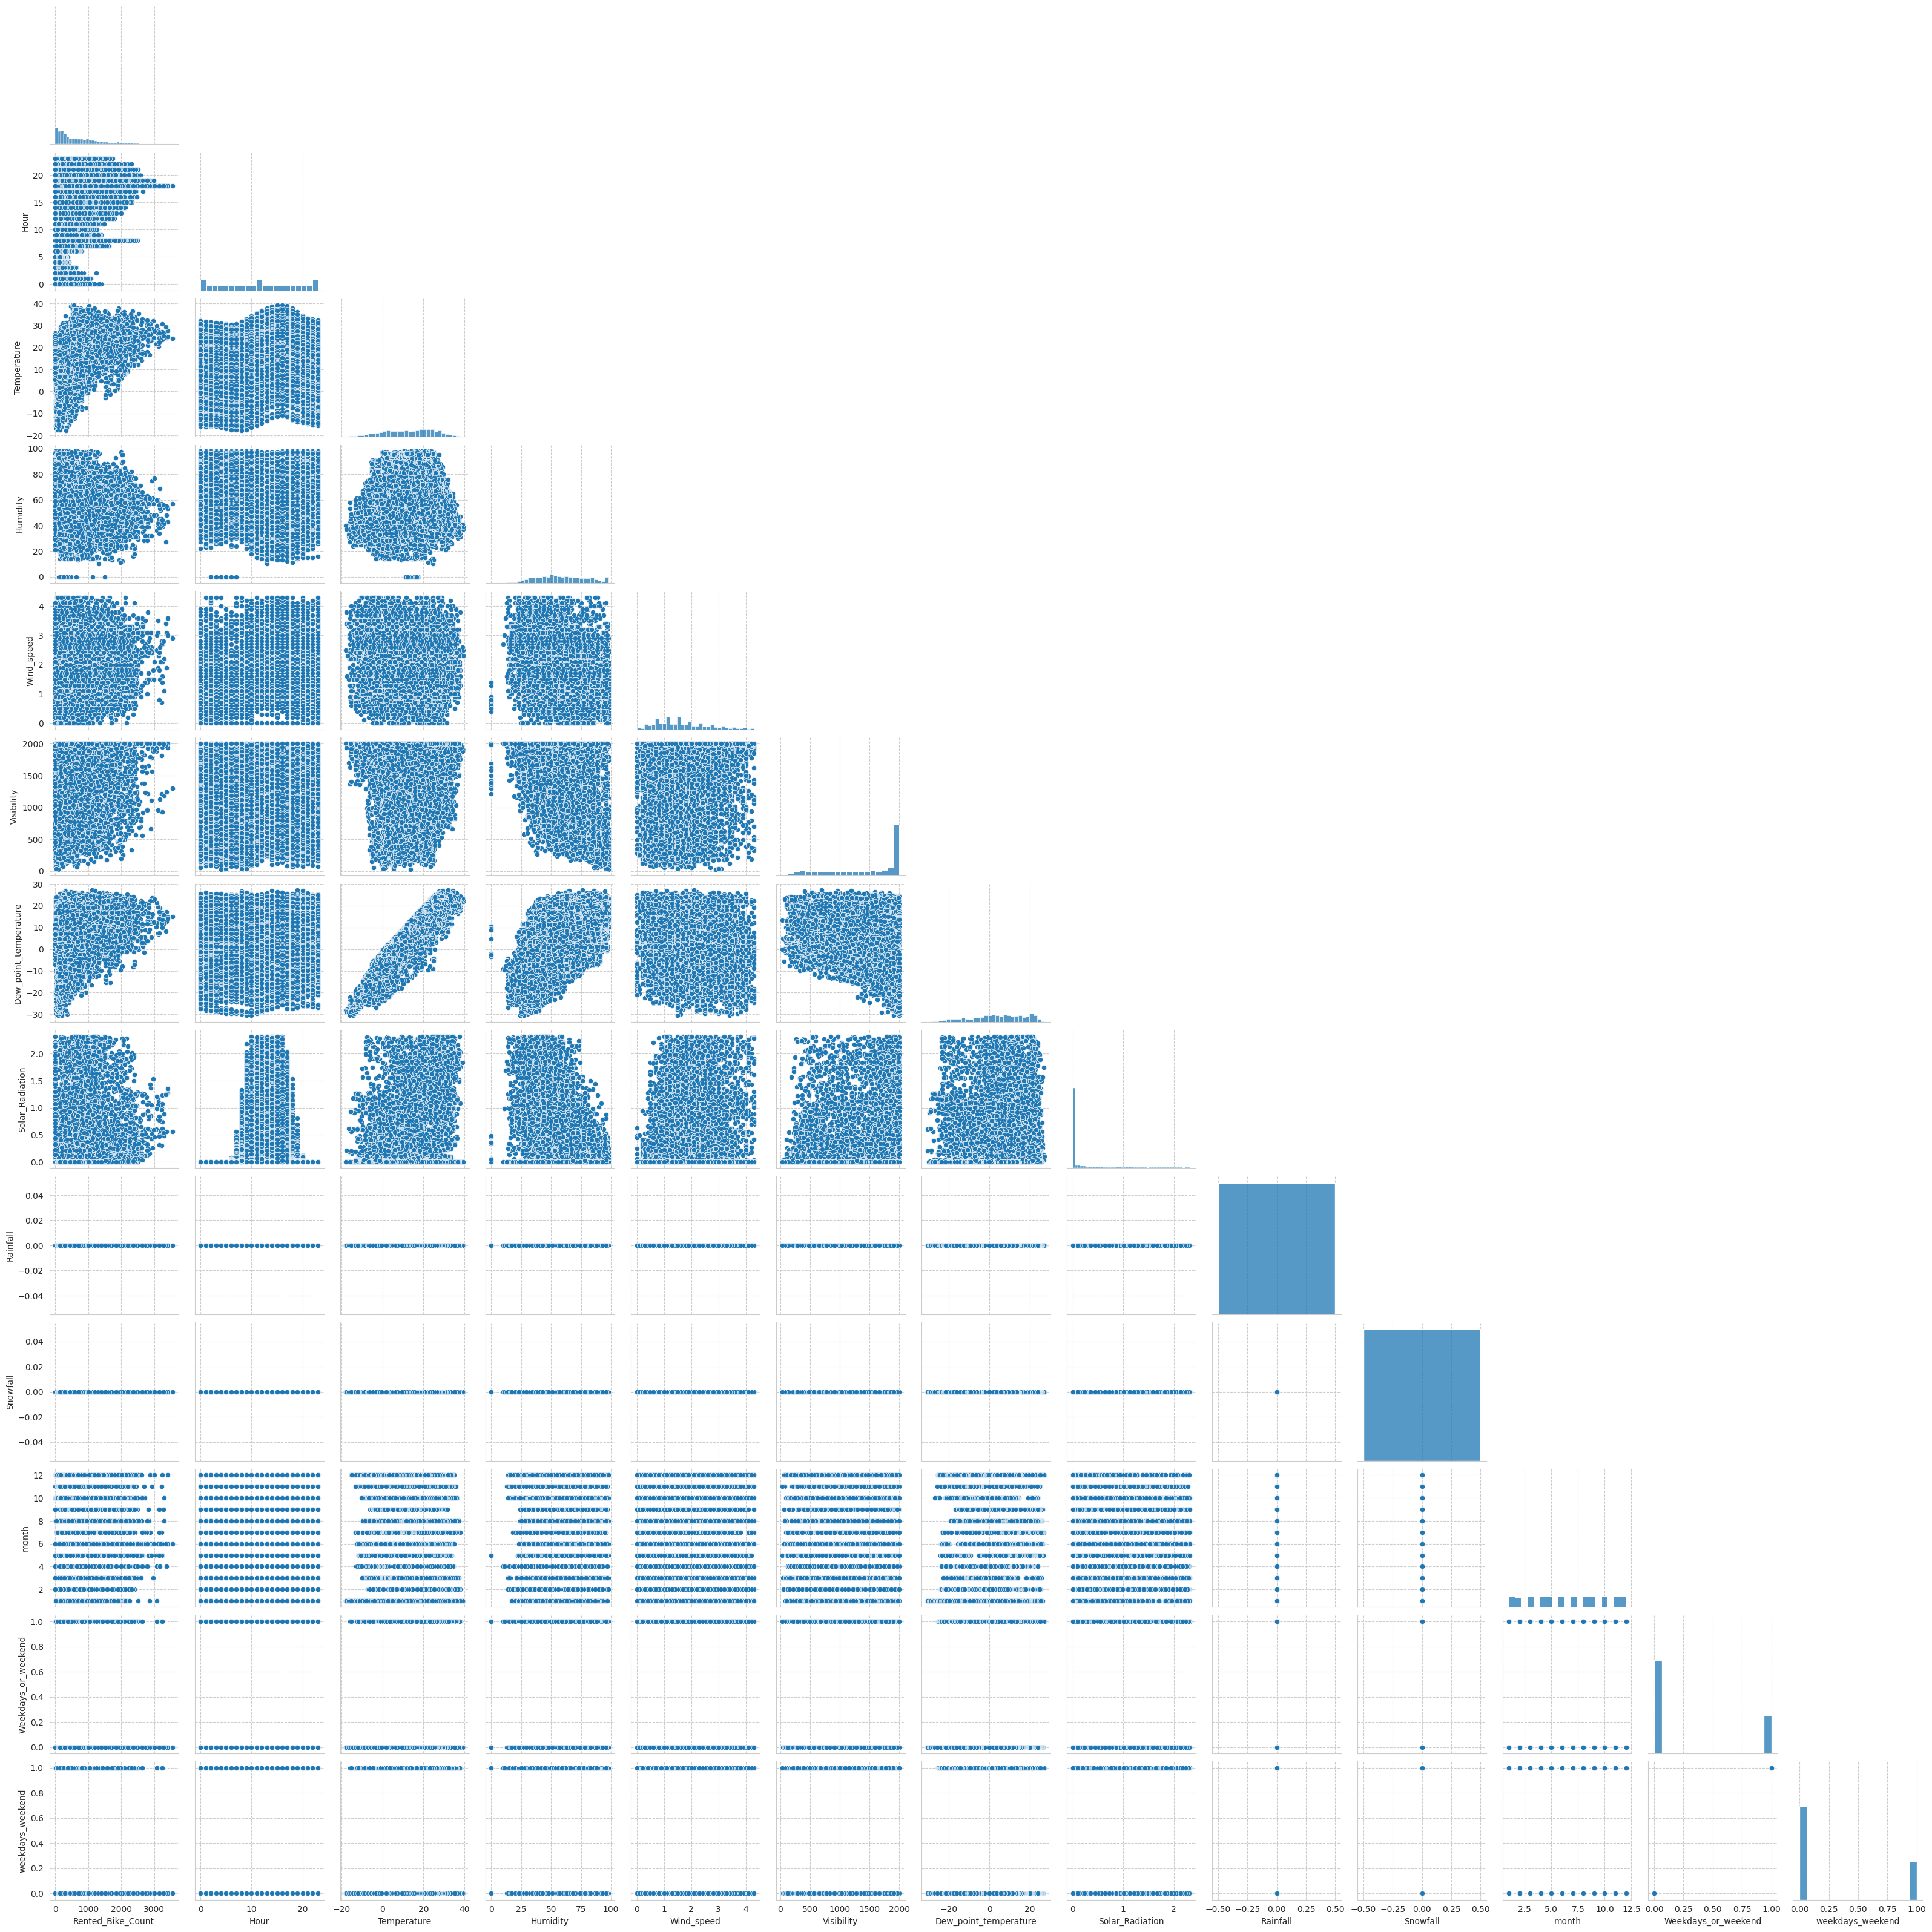

In [305]:
# Chart - 15 visualization code
#ploting pairplot for more info
sns.pairplot(df, corner=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Setting up Null Hypothesis (H0) and Stating the alternate hypothesis (Ha) and significance level


1.   H0 : The Rented_Bike_Count in working days and non- working days are equal.
2.   Ha : The Rented_Bike_Count in working days and non- working days is not equal
3.alpha = 0.05




#### 2. Perform an appropriate statistical test.

In [326]:
# Perform Statistical Test to obtain P-Value
df.shape

(8760, 17)

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   object 
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  Day                    8760 non-null   object 
 15  Week

In [328]:
df['Holiday'].value_counts(normalize = True) * 100

No Holiday    95.068493
Holiday        4.931507
Name: Holiday, dtype: float64

In [329]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [330]:
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [331]:
working_data = df[df['Holiday'] == 'Holiday'].sample(400, replace = False)

non_working_data = df[df['Holiday'] == 'No Holiday'].sample(400, replace = False)

In [332]:
round(working_data['Rented_Bike_Count'].std()**2,2), round(non_working_data['Rented_Bike_Count'].std()**2 ,2)

(326912.32, 419122.66)

Observations: The variance is not equal for both the samples

In [333]:
#Calculating the p-value and test- statistics usinging ttest_ind() for this right skwed distribution sample.
# Alternative == greater as it's right skewed and one-sided
t_test, p_value = stats.ttest_ind(working_data['Rented_Bike_Count'],non_working_data['Rented_Bike_Count'],
                                  alternative='greater', equal_var = False)
t_test, p_value

(-5.319061700652366, 0.9999999319497062)

##### Which statistical test have you done to obtain P-Value?

The distribution of the population samples is right-skwed and it's not normal which violates is our assumption for conducting 2 sample t test. Also the varaince of the samples is unequal.
We got a p-value of 0.99 which is greater than 0.05 and hence we can say that we fail to reject null hypothesis.

##### Why did you choose the specific statistical test?

Hence we will do log-transformation,We will confirm after log - transformation as wellAnswer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Setting up Null Hypothesis (H0) and Stating the alternate hypothesis (Ha) and significance level


1.   H0 : The Rented_Bike_Count in working days and non- working days are equal.
2.   Ha : The Rented_Bike_Count in working days and non- working days is not equal
3.alpha = 0.05

#### 2. Perform an appropriate statistical test.

In [334]:
# Perform Statistical Test to obtain P-Value
#Applying log on the data - Log Normal Distribution
sample_w_log = np.log(working_data['Rented_Bike_Count']).sample(400)
sample_nw_log = np.log(non_working_data['Rented_Bike_Count']).sample(400)

In [335]:
statistic,p_value = stats.ttest_ind(sample_w_log,sample_nw_log , alternative = 'greater')
statistic,p_value

(nan, nan)

In [336]:
def htResult(p_value):
    significance_level = 0.05
    if p_value <= significance_level: 
        print('Reject NULL HYPOTHESIS') 
    else: 
        print('Fail to Reject NULL HYPOTHESIS') 

In [337]:
htResult(p_value)

Fail to Reject NULL HYPOTHESIS


In [338]:
stats.levene(sample_w_log, sample_nw_log, center='median')

LeveneResult(statistic=nan, pvalue=nan)

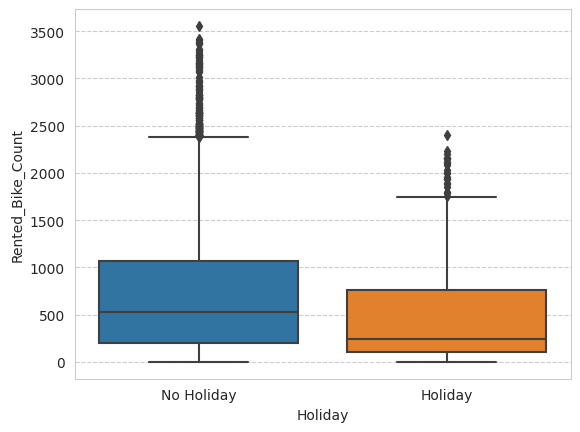

In [339]:
sns.boxplot(x='Holiday', y='Rented_Bike_Count', data=df)
plt.show()

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

As the p value > alpha(0.05) , we  reject H0 and thus we can say that the Rented_Bike_Count of renting of bikes in both Holiday and no holiday days is not equal. And we can confirm this using the boxplot as well

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1.   H0 : Both Rented_Bike_Count and seasons are independent of each other
2.   Ha : There is dependency of seasons on Both Rented_Bike_Count
3.aplha = 0.05

#### 2. Perform an appropriate statistical test.

In [340]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [341]:
# The variance is different for all the 4 seasons
df.groupby(['Seasons'])['Rented_Bike_Count'].describe() 

count         mean         std  min     25%    50%      75%     max
Seasons                                                                      
Autumn   2184.0   819.597985  651.085621  0.0  241.75  763.5  1197.50  3298.0
Spring   2208.0   730.031250  621.509635  0.0  206.00  583.0  1105.25  3251.0
Summer   2208.0  1034.073370  690.244759  9.0  526.75  905.5  1442.50  3556.0
Winter   2160.0   225.541204  150.372236  3.0  110.00  203.0   305.00   937.0

In [342]:
stat,p = stats.f_oneway(df[df['Seasons'] == 'Spring']['Rented_Bike_Count'].sample(400),
                        df[df['Seasons'] == 'Summer']['Rented_Bike_Count'].sample(400),
                        df[df['Seasons'] == 'Autumn']['Rented_Bike_Count'].sample(400),
                        df[df['Seasons'] == 'Winter']['Rented_Bike_Count'].sample(400))
stat,p

(129.2526150304819, 5.951221968329683e-75)

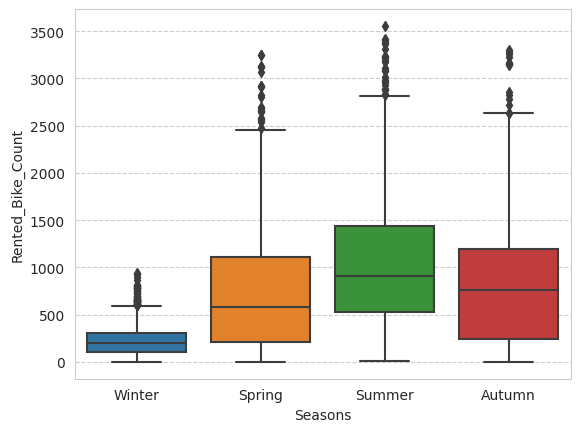

In [343]:
sns.boxplot(x='Seasons', y='Rented_Bike_Count', data=df)
plt.show()

##### Which statistical test have you done to obtain P-Value?

As the p value < alpha(0.05) , we reject H0 and thus we can conclude that Rented_Bike_Count of bikes differs with a change in season.

##### Why did you choose the specific statistical test?

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [344]:
# Handling Missing Values & Missing Value Imputation
#Check The Distribution
df.isna().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
month                    0
Day                      0
Weekdays_or_weekend      0
weekdays_weekend         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

there were no missing values in the data set

### 2. Handling Outliers

In [345]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [346]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [347]:
# Expand Contraction

#### 2. Lower Casing

In [348]:
# Lower Casing

#### 3. Removing Punctuations

In [349]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [350]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [351]:
# Remove Stopwords

In [352]:
# Remove White spaces

#### 6. Rephrase Text

In [353]:
# Rephrase Text

#### 7. Tokenization

In [354]:
# Tokenization

#### 8. Text Normalization

In [355]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [356]:
# POS Taging

#### 10. Text Vectorization

In [357]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [358]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [359]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [360]:
# Transform Your data

### 6. Data Scaling

In [361]:
# Scaling your data

In [362]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [363]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [364]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]


In [365]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

In [366]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

In [367]:
#creating function to run diffirent models


def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

In [368]:
#creating function to get feature importance
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

Answer Here.

In [369]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [370]:
#Train | Test Split for LR
# Train - Spliting  data
X=final_df.drop(['Rented_Bike_Count'],axis=1)

In [371]:
X.shape

(8760, 45)

In [372]:
y=np.sqrt(final_df['Rented_Bike_Count'])

In [373]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [374]:
# Handling Imbalanced Dataset (If needed)

##### Do you think the dataset is imbalanced? Explain Why.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
#Linear Regresseion
from sklearn.linear_model import LinearRegression


In [ ]:
#linear regression model

linear_model= LinearRegression()

In [391]:
linear_model.coef_

array([-4.45516875e-01, -1.00652335e+00, -1.55282138e+00, -1.95652482e+00,
       -1.89707297e+00, -9.14946835e-01,  2.65754674e-01,  1.46653031e+00,
        1.04259284e-01, -8.46508173e-01, -7.81882418e-01, -7.00832010e-01,
       -6.73971582e-01, -6.60934875e-01, -3.51979561e-01,  4.99708338e-03,
        7.62383288e-01,  1.96787084e+00,  1.45113624e+00,  1.22759068e+00,
        1.26505139e+00,  9.76227518e-01,  2.84858596e-01, -1.25598009e+00,
       -1.31303729e+00, -3.37578019e+00,  6.22104813e-01,  5.03326441e+00,
       -6.04425247e-01, -5.48469988e+00, -2.32460414e-01, -4.16931523e-02,
        6.72812546e+00,  1.26930635e+00, -1.62645120e+00,  2.19251625e-02,
        2.99964344e-01, -3.20354344e-01])


================Evalution Matrix=========================

MSE : 121949.7009190273
RMSE : 349.21297358349574
R2 : 0.7033815587736685
Adjusted R2 :  0.6981414375432637

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



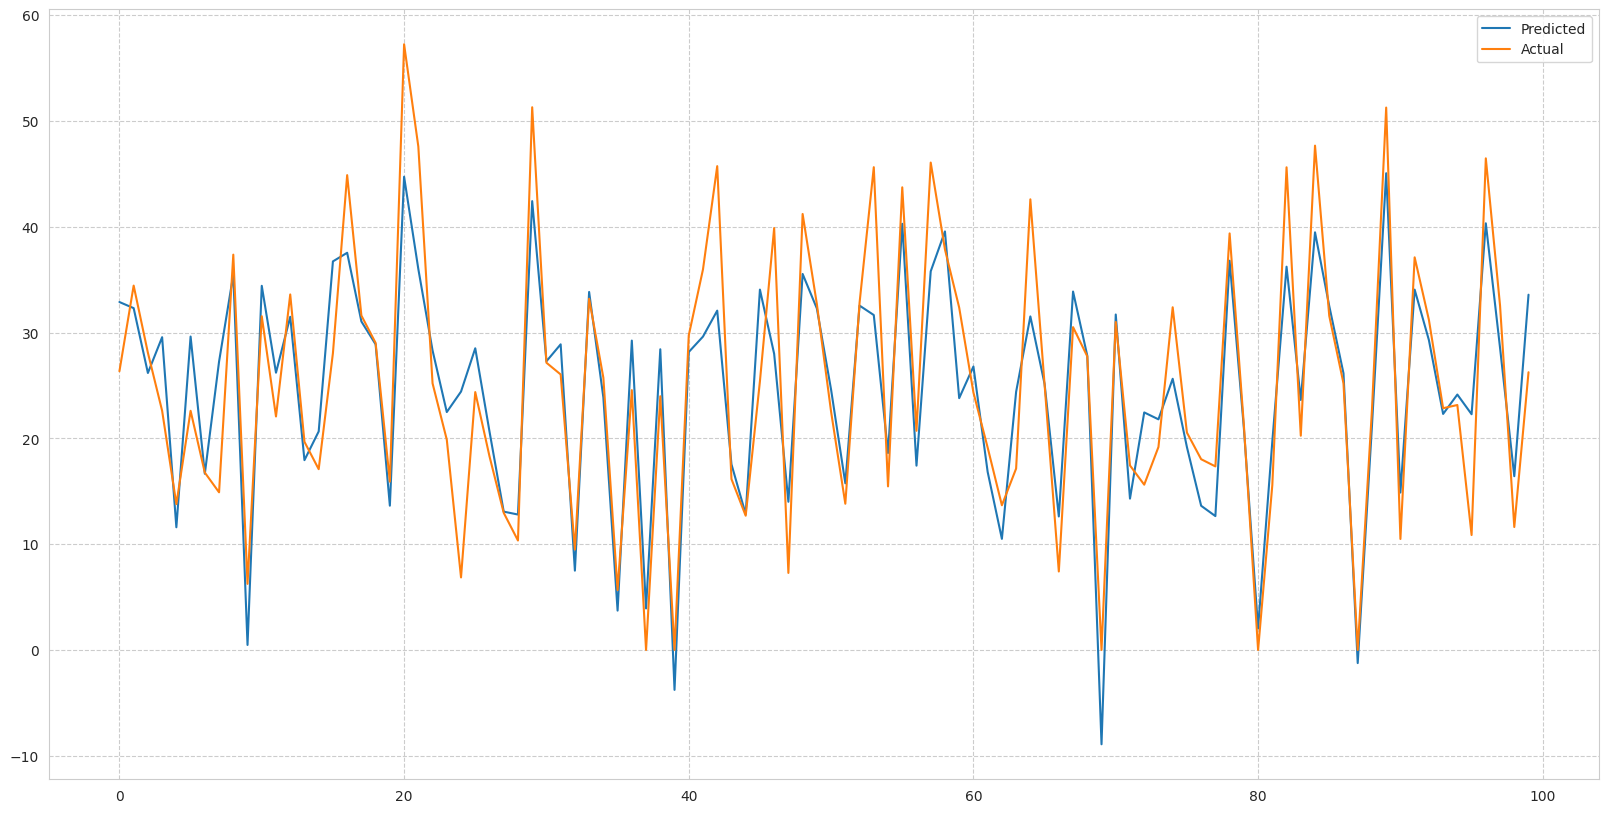

In [ ]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

###ML-LASSO

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)#
 #finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
# Fit the Algorithm
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


================Evalution Matrix=========================

MSE : 122052.16556588022
RMSE : 349.3596507410096
R2 : 0.7031323338587956
Adjusted R2 :  0.6978878097707595

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



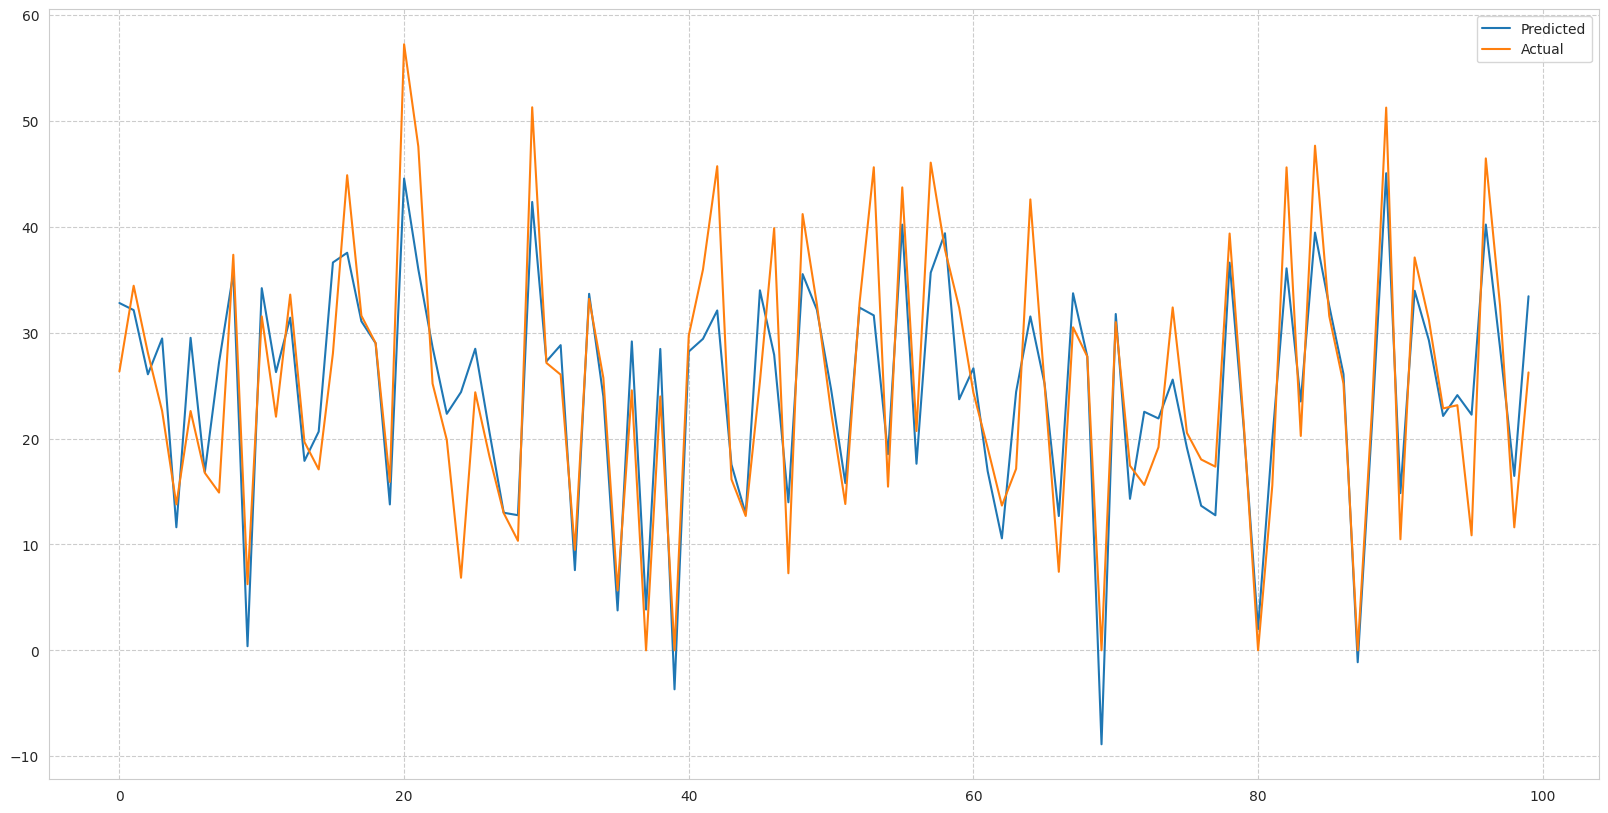

In [ ]:
# Predict on the model
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evalution Matrix=========================

MSE : 121767.52361008119
RMSE : 348.95203626011585
R2 : 0.7038246689166141
Adjusted R2 :  0.6985923757593995

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



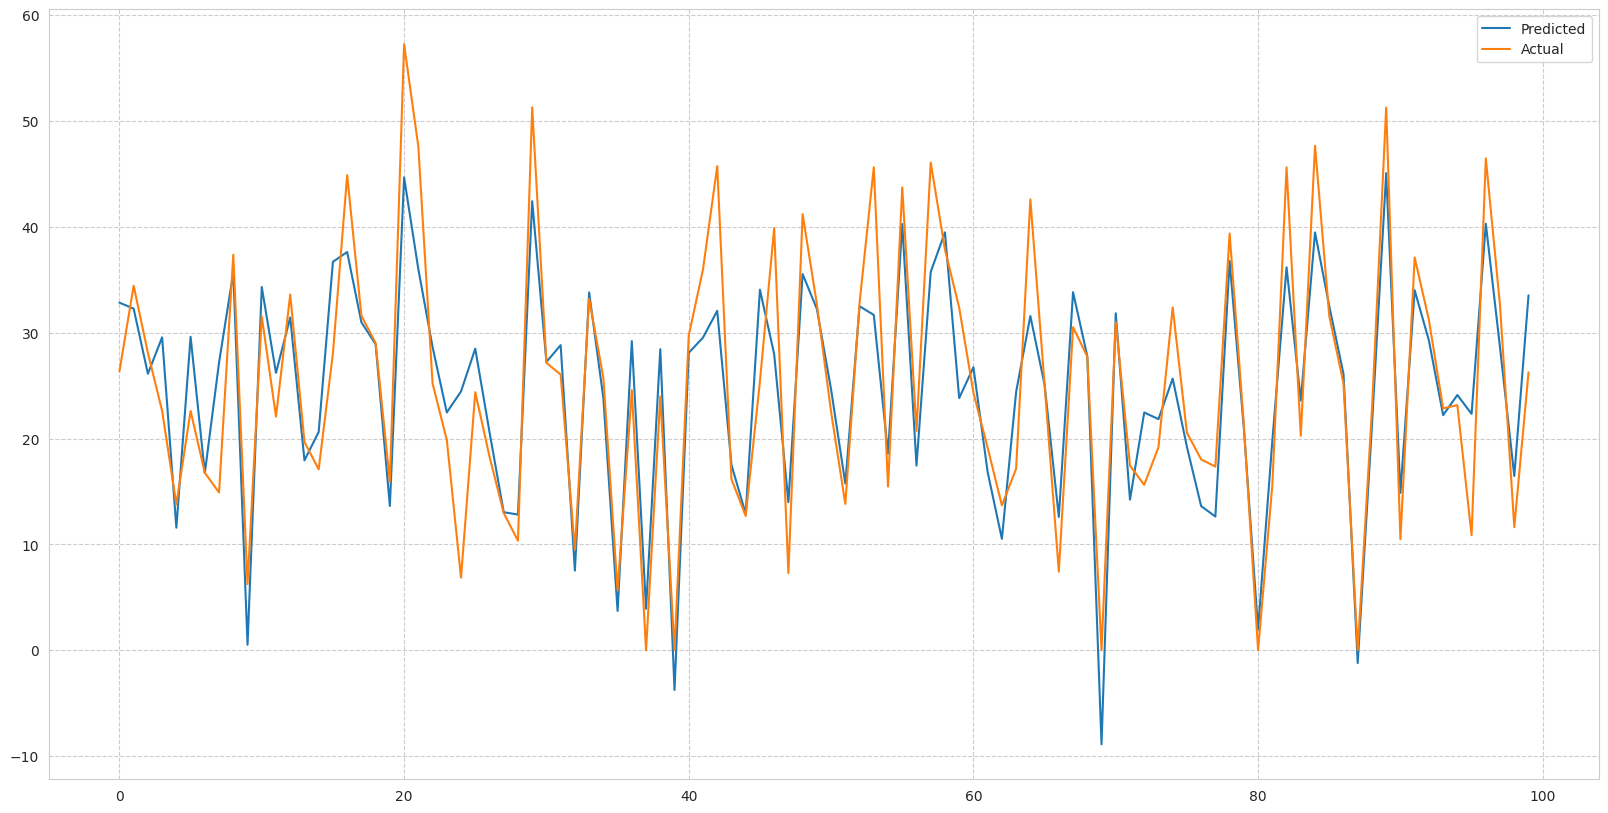

In [ ]:
# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

In [ ]:
#ElasticNet Regression
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


================Evalution Matrix=========================

MSE : 121794.35461033853
RMSE : 348.99047925457586
R2 : 0.7037594078342753
Adjusted R2 :  0.6985259617616125

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



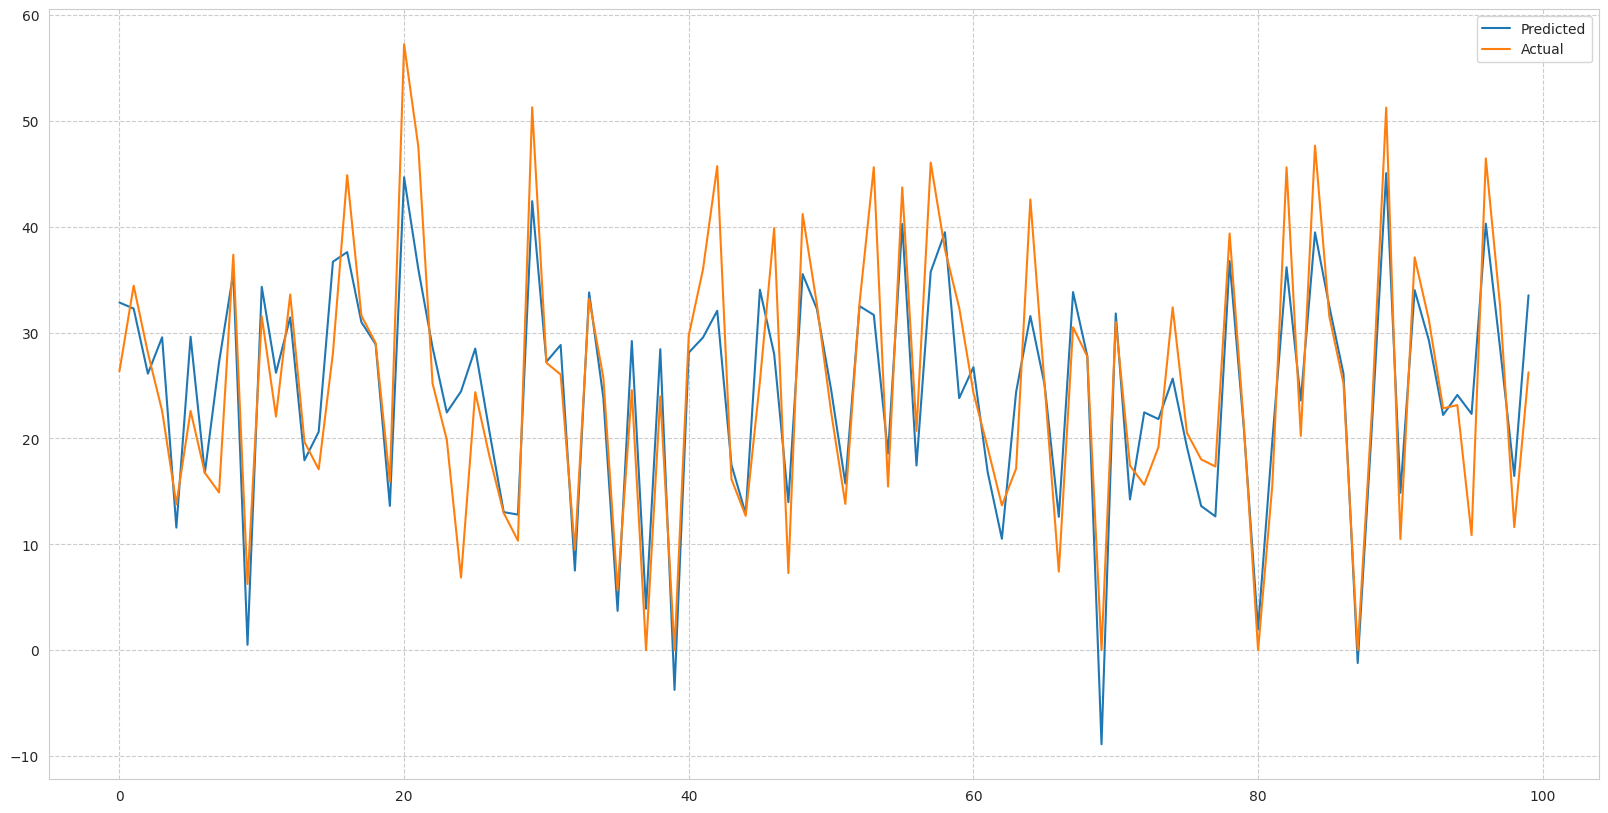

In [ ]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

###ML-Polynomial Regression

In [ ]:
#Polynomial Regression
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

MSE : 58376.01300970755
RMSE : 241.6112849386542
R2 : 0.8580119356303739
Adjusted R2 :  0.8555035458367682

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



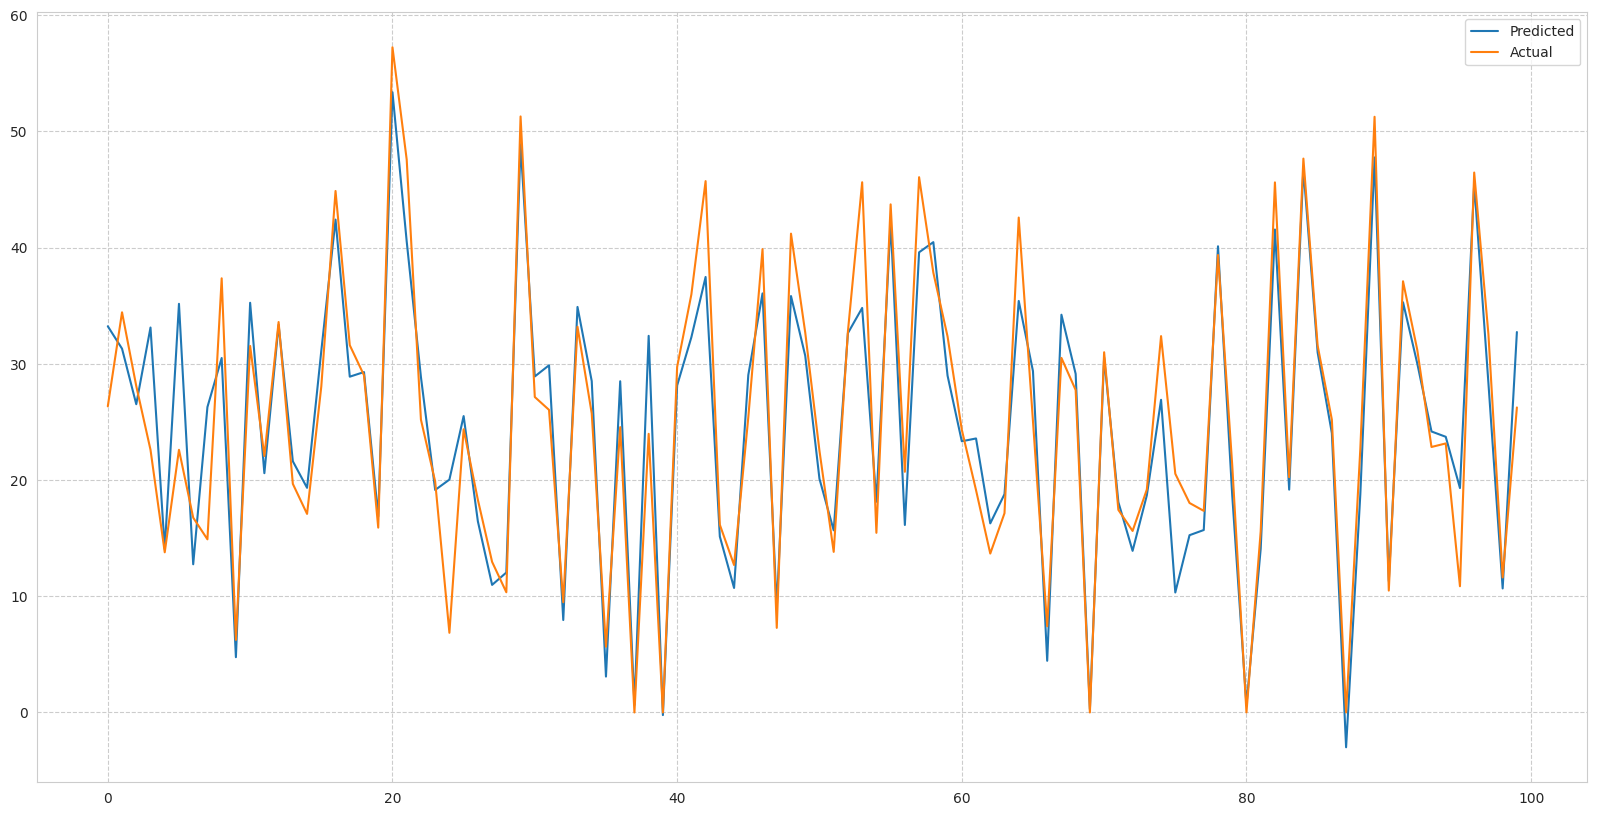

In [ ]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

###ML-KNN and Tree Based Method

In [ ]:
#KNN and Tree Based Method
#Train | Test split Data For Tree based methods
#creatin X for independent variable
X=final_df.drop(['Rented_Bike_Count'],axis=1)

In [ ]:
#creating y for dependent variable
y=final_df['Rented_Bike_Count']

In [ ]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#KNN Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#creating model
scaler = MinMaxScaler()

In [ ]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


================Evalution Matrix=========================

MSE : 102846.66742770167
RMSE : 320.6971584340929
R2 : 0.7486646619835183
Adjusted R2 :  0.7442245211910374

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



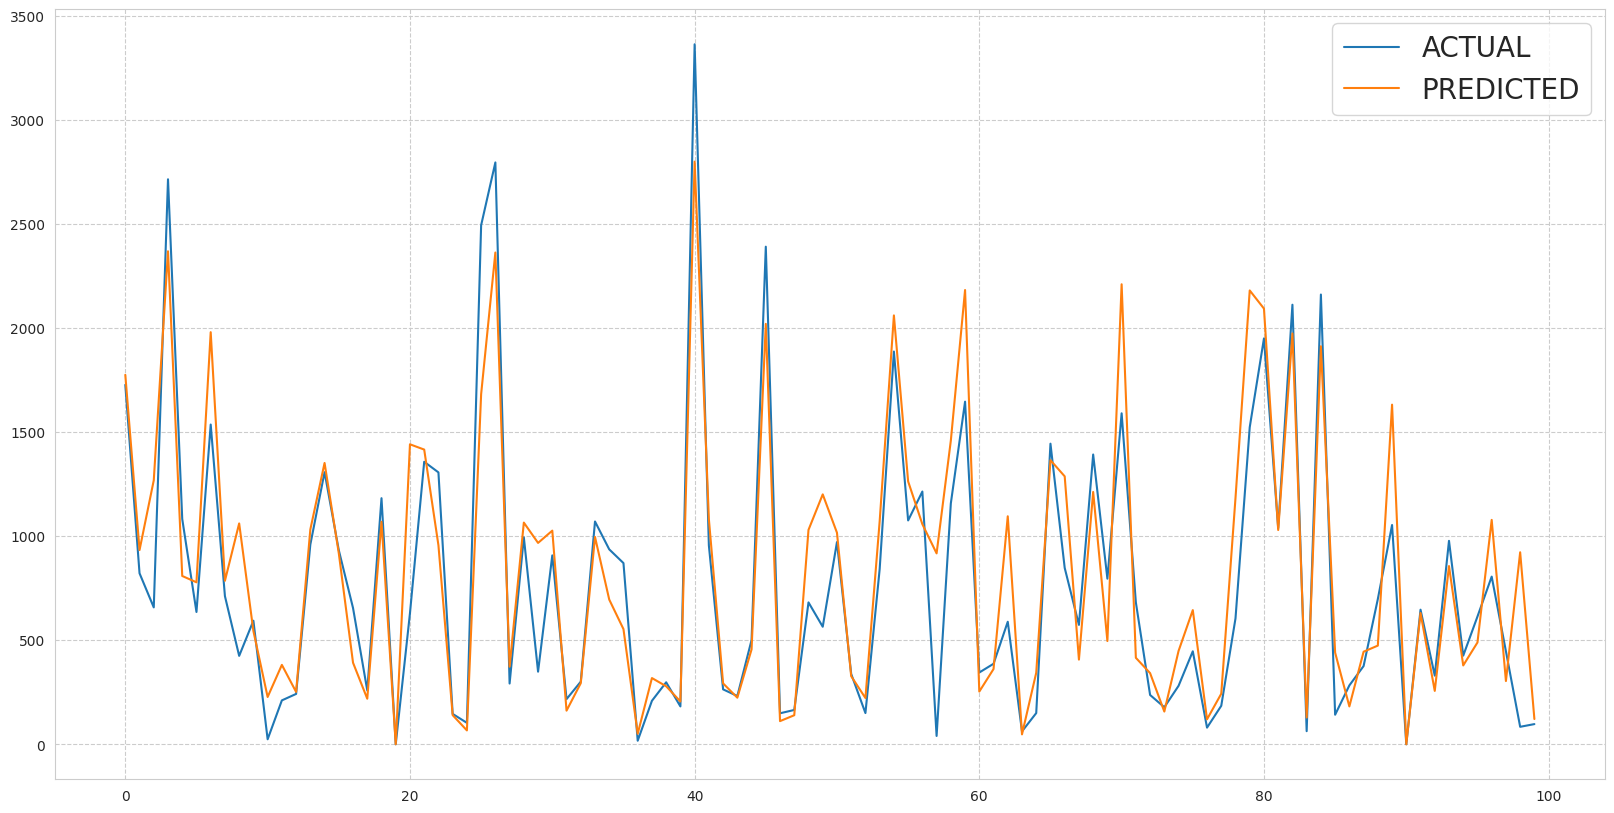

In [ ]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
run_model(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)

###ML-Decision Tree Regression

In [ ]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor


================Evalution Matrix=========================

MSE : 95020.46712328767
RMSE : 308.25390041861215
R2 : 0.767790227722217
Adjusted R2 :  0.7636879630329767

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



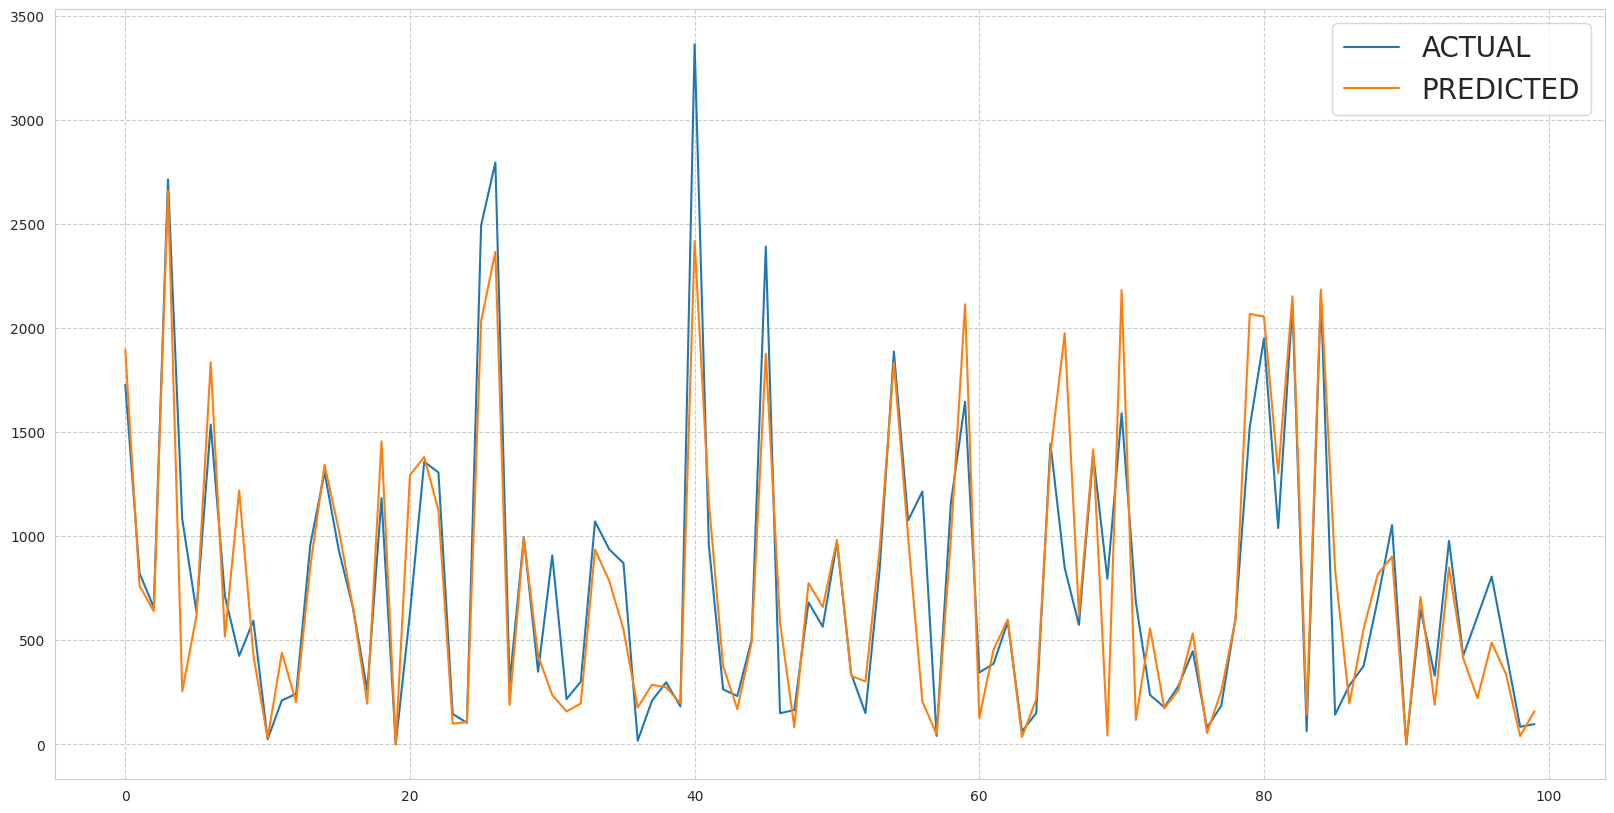

In [ ]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Gradient Boosting
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [ ]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#grid search for gradient boosting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 49970.68215373064
RMSE : 223.54123144004248
R2 : 0.8778823018368489
Adjusted R2 :  0.8757249459418235

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



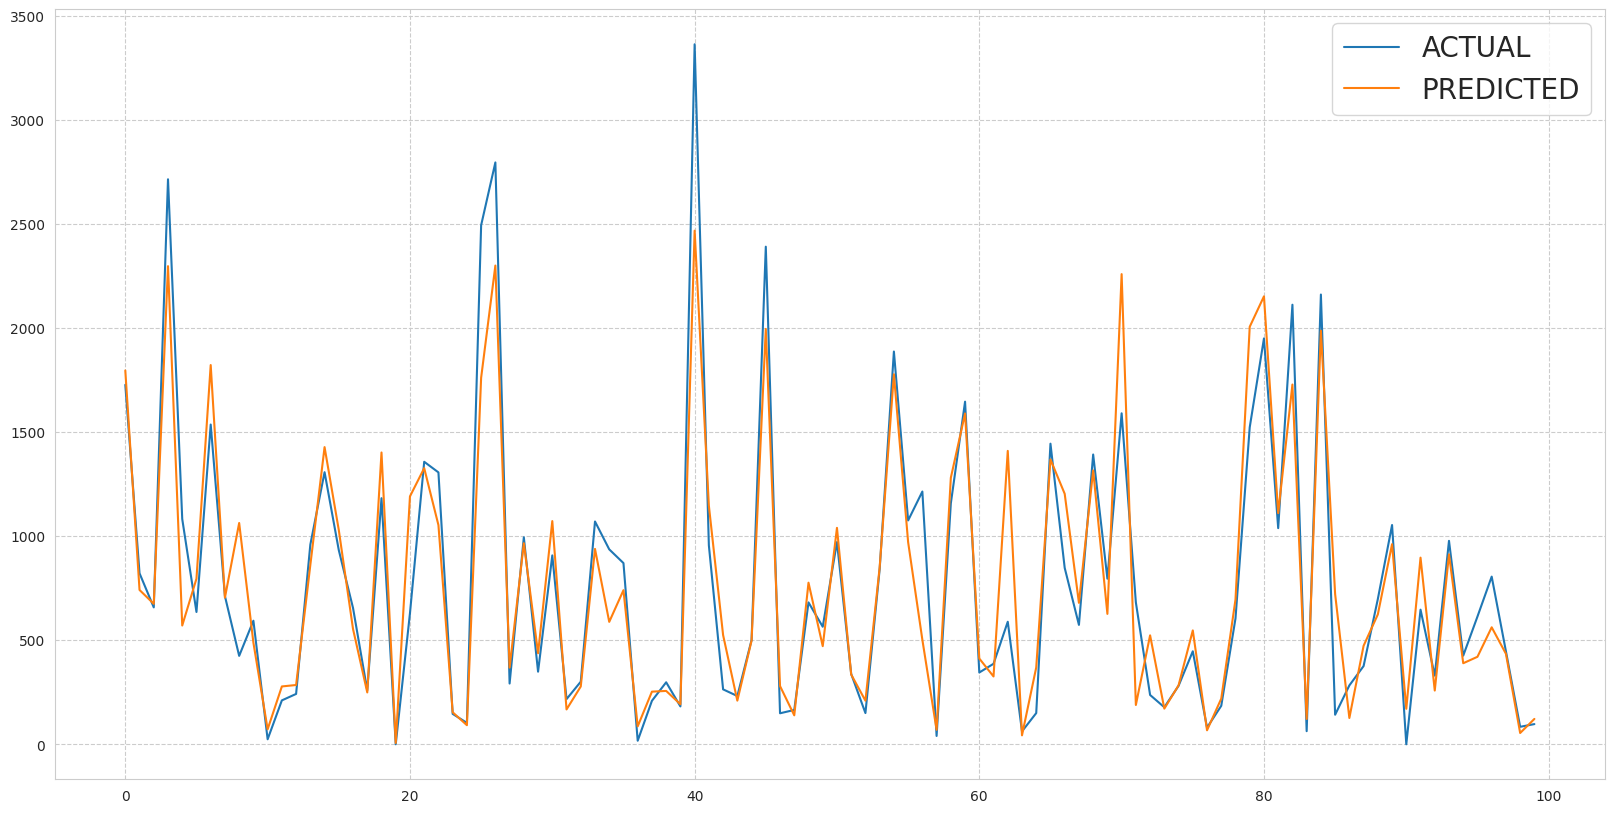

In [ ]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [ ]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

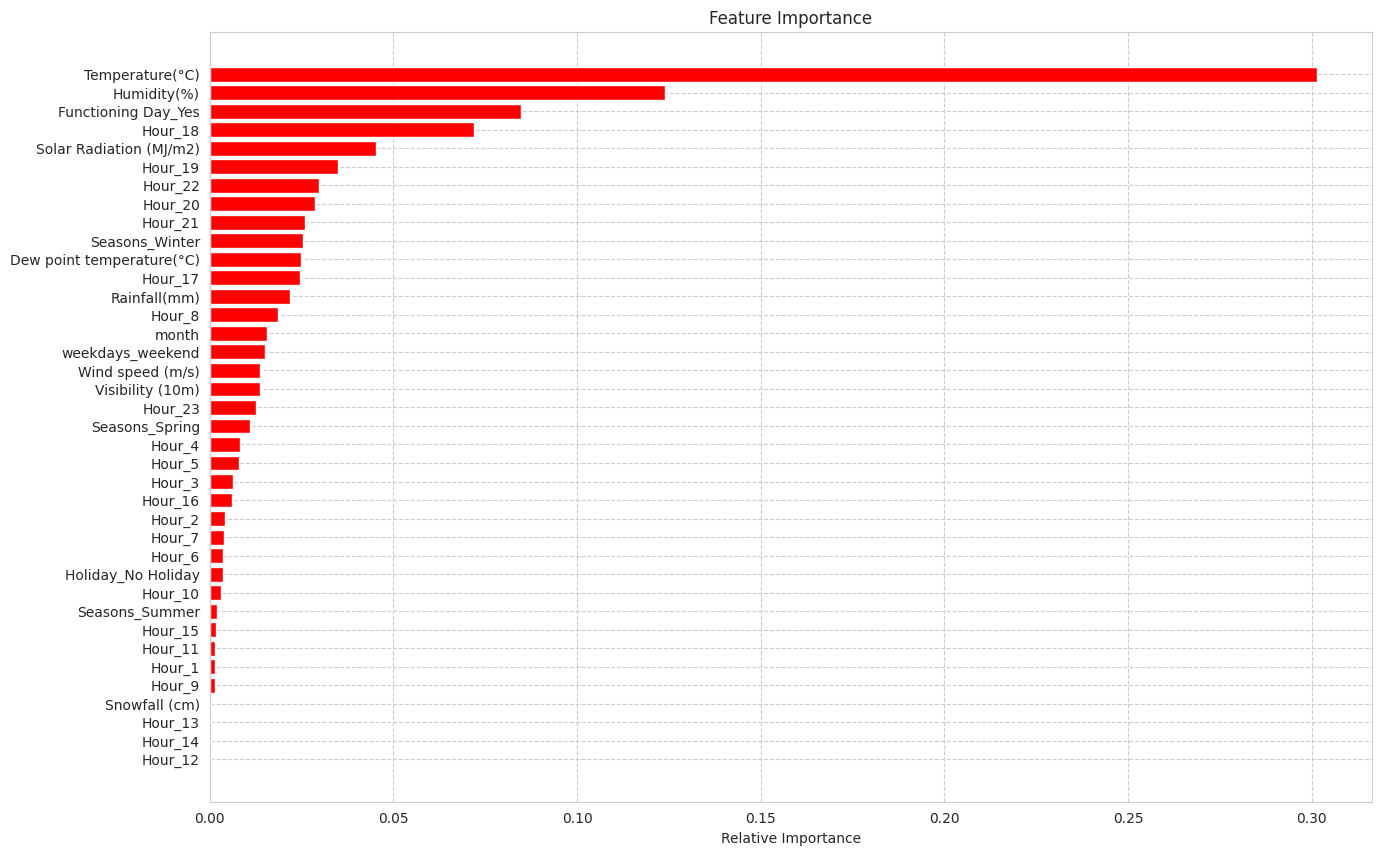

In [ ]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)

##ML 4

In [ ]:
#eXtreme Gradient Boosting
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [ ]:
#creating Xgboost model
xgb_model=XGBRegressor()

In [ ]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 43589.13129953441
RMSE : 208.78010273858573
R2 : 0.8934774521817668
Adjusted R2 :  0.8915956033593154

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



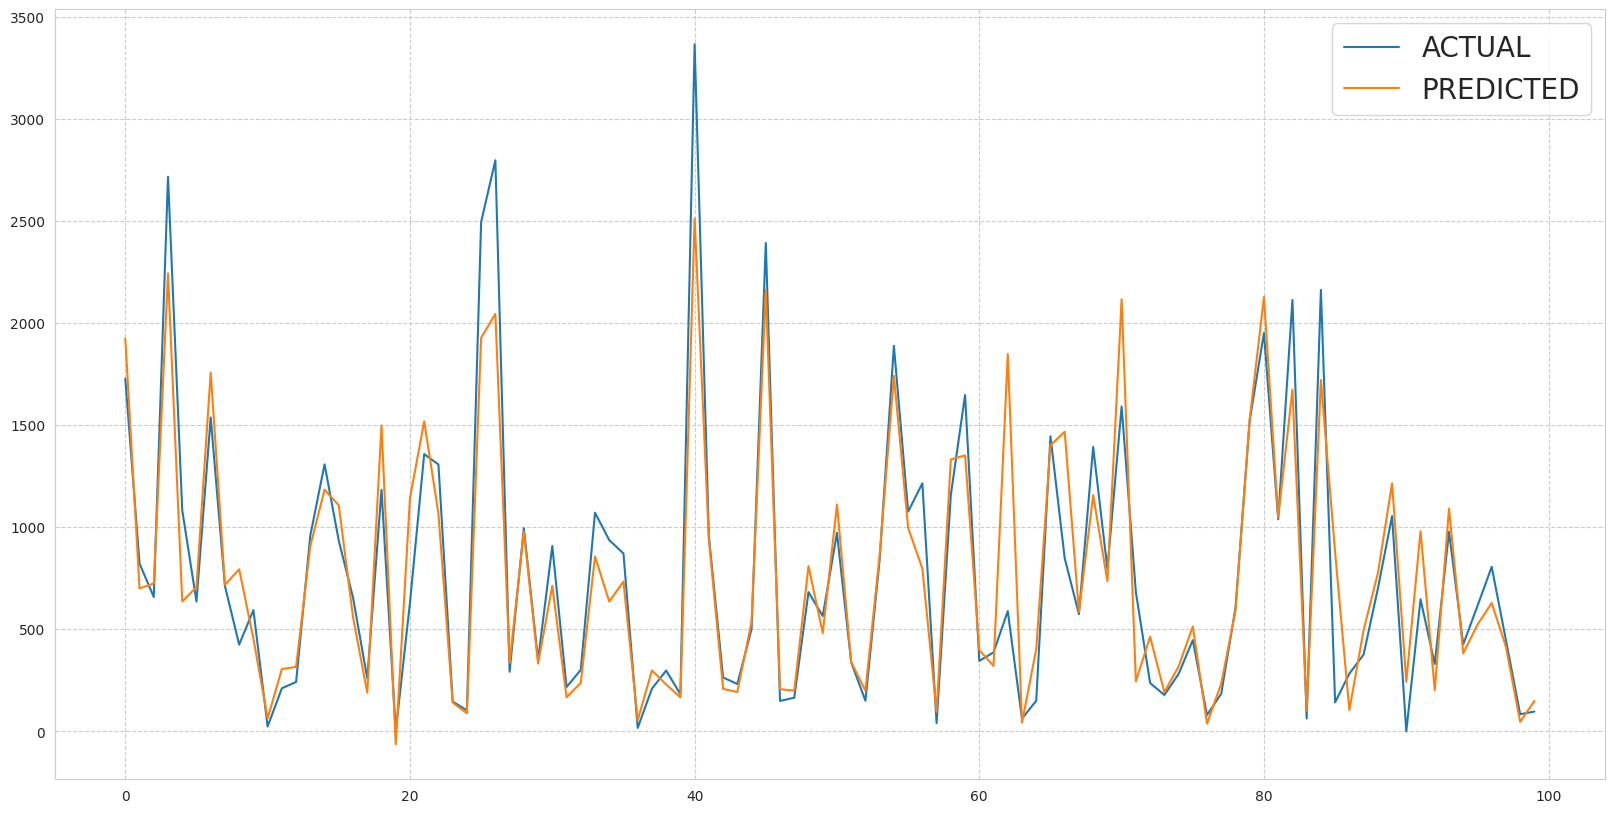

In [ ]:
#calling run_model to train,fit and evalution of xgb_grid model
run_model(xgb_grid,X_train,y_train,X_test,y_test);

In [ ]:
#getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

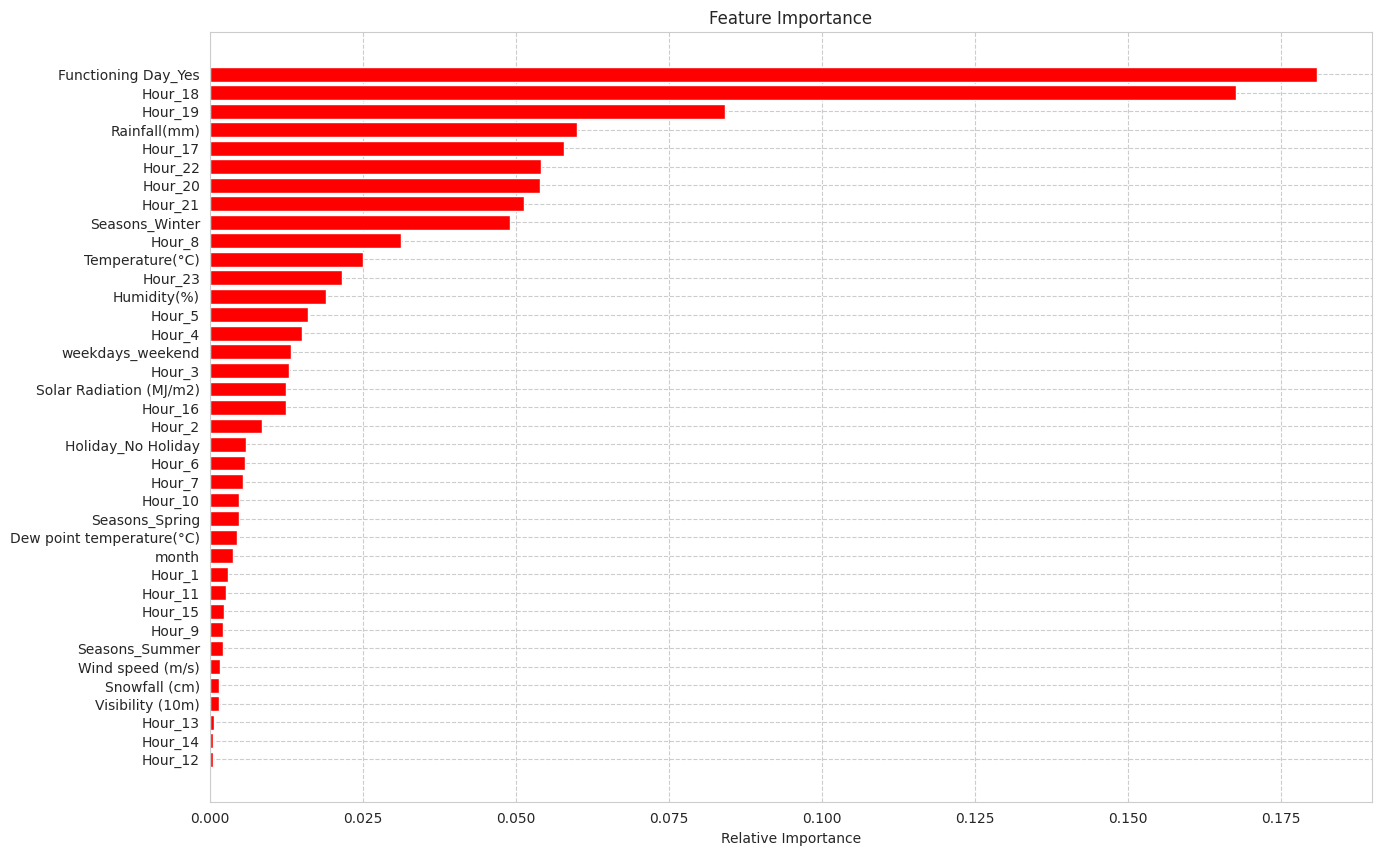

In [ ]:
#getting best param of rf model given by xgb_grid model
get_features_importance(optimal_xgb_model,X_train)

##ML 5

In [ ]:
#CatBoost
#installing catboost
!pip install catboost

In [ ]:
#importing cat boost Regressor
from catboost import CatBoostRegressor

In [ ]:
# creating Catboost model
cb_model=CatBoostRegressor(verbose=0)

In [ ]:
#calling run_model to train,fit and evalution of catboost model
run_model(cb_model,X_train,y_train,X_test,y_test)

In [ ]:
#checking params of cat boost model
cb_model.get_all_params()

In [ ]:
#getting and visualizing features importance of catboost model
get_features_importance(cb_model,X_train)

##ML 6

In [ ]:
#Random Forest
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#creating model of random forest
rf_model = RandomForestRegressor()


In [ ]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [ ]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)

In [ ]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##ML 7

In [ ]:
#lightGBM
import lightgbm as lgb

In [ ]:
lgbr=lgb.LGBMRegressor()

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

================Evalution Matrix=========================

MSE : 39860.43960266524
RMSE : 199.6507941448399
R2 : 0.902589580084702
Adjusted R2 :  0.9008687079523072

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



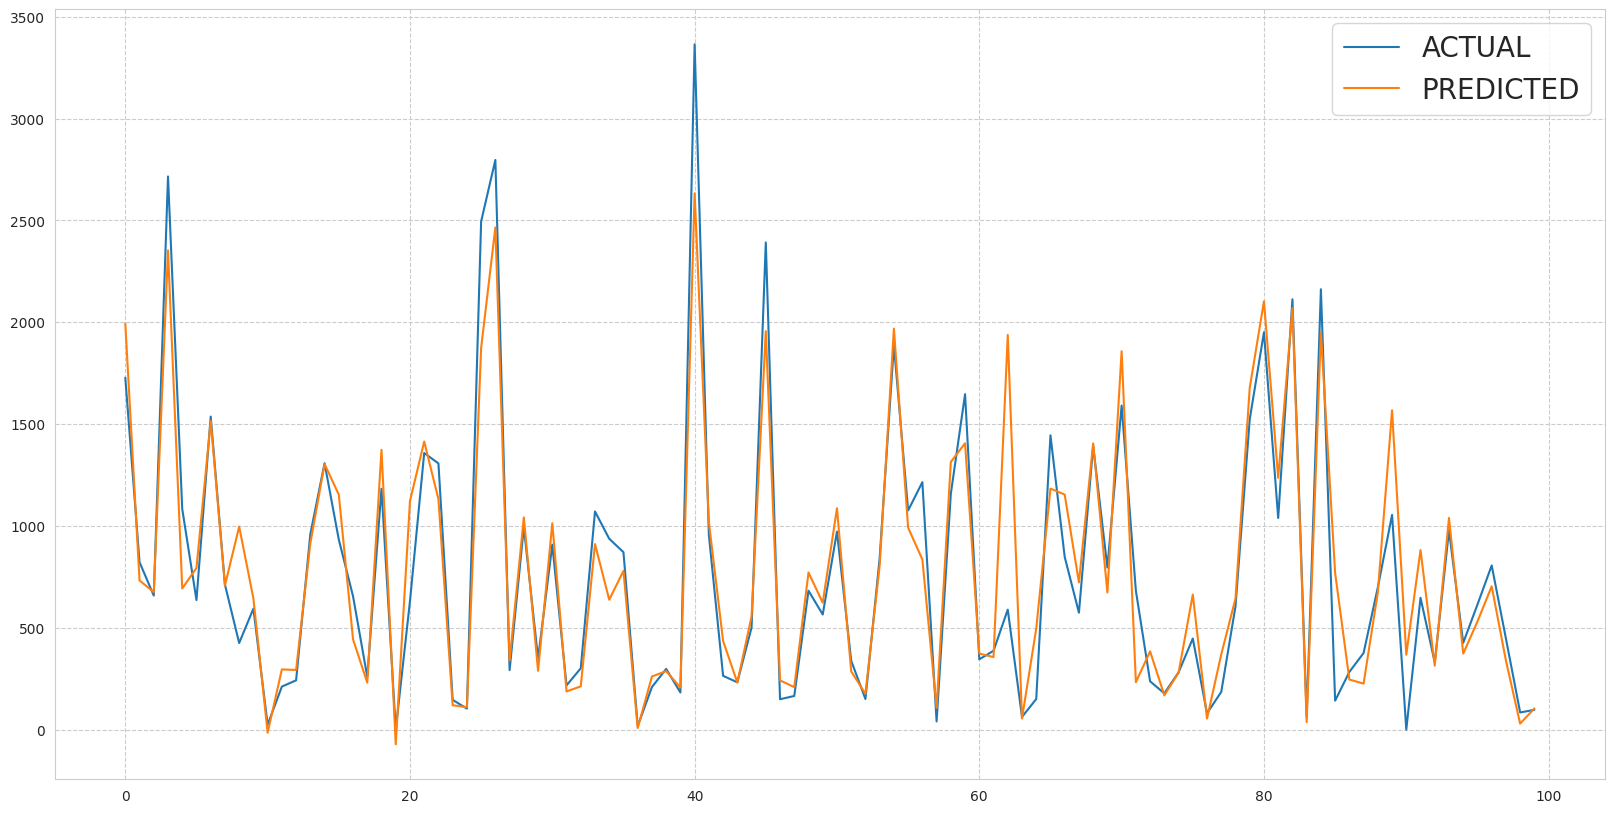

In [ ]:
#calling run_model to train,fit and evalution of catboost model
run_model(lgbr_grid,X_train,y_train,X_test,y_test)

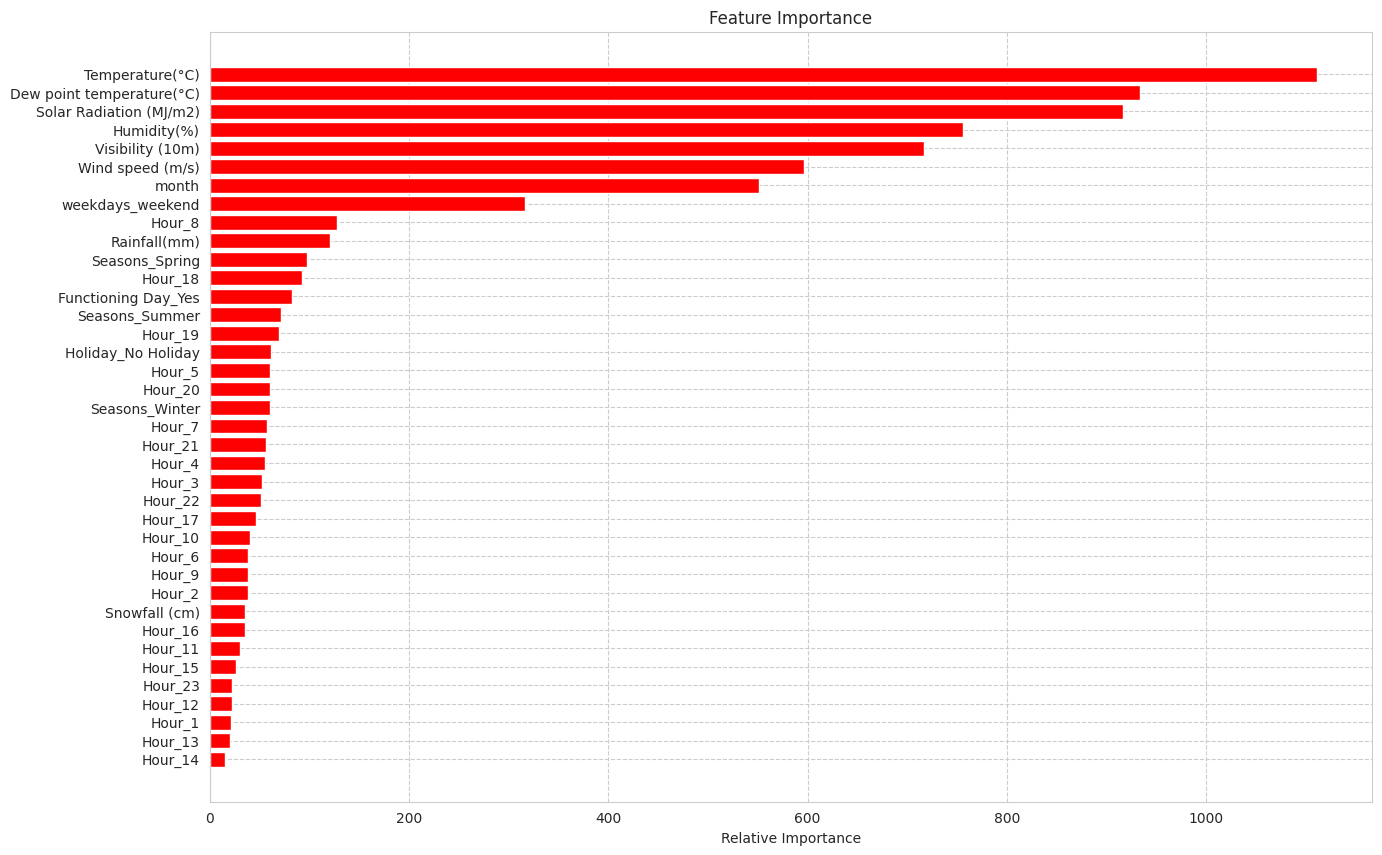

In [ ]:
#getting and visualizing features importance of catboost model
get_features_importance(lgbr_grid.best_estimator_,X_train)

In [ ]:
#Combined Evaluation Matrix of All the models
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [ ]:
#list of all model made ,'Gradient_Boosting',,'CATBoost'
#'K-Nearyest_Neighbor' 'Elasticnet'
model_name=['Linear','Lasso','Ridge',,'Polynomial','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB','CATBoost','lightGBM']

In [ ]:
#converting dictionary to dataframe from easy visual
matrices_df = pd.DataFrame.from_dict(all_model_matrices, orient="index", columns =model_name)

In [ ]:
matrices_df

In [ ]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
final_matrices

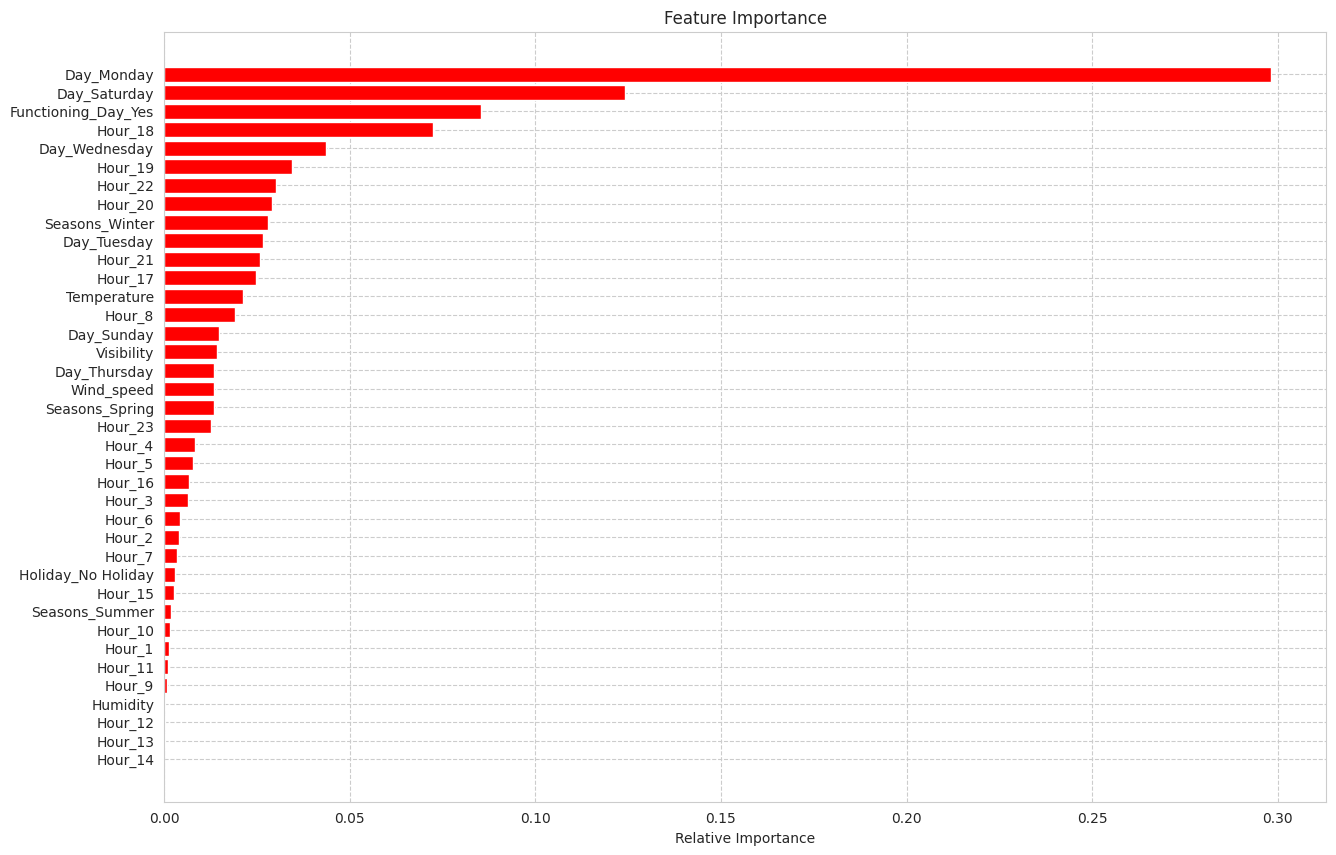

In [383]:
#getting features importance of decision tree
get_features_importance(dt_model,X_train)

In [402]:
#creating dictionary to store all the metrices 
all_matrices={'Mean_Absolute_error':mean_absolut_error,'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'Training_score':training_score,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [398]:
#list of all model name 
model_name=['Linear','Lasso','Ridge','Polynomial','Decision_Tree','Random_Forest',] #'Stacking Regressor''Bagging','Gradient_Boosting','XG_Boost'

# Combined Evaluation Matrix of All the models

In [404]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [405]:
#list of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','K-Nearyest_Neighbor','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB','CATBoost','lightGBM']

In [ ]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [ ]:
matrices_df

Linear  ...      lightGBM
Mean_square_error       175590.552873  ...  35410.753754
Root_Mean_square_error     419.035264  ...    188.177453
R2                           0.572911  ...      0.913464
Adjusted_R2                  0.569766  ...      0.912826

[4 rows x 12 columns]

In [ ]:
final_matrices

Models  Mean_square_error  ...        R2  Adjusted_R2
0                Linear      175590.552873  ...  0.572911     0.569766
1                 Lasso      175560.907118  ...  0.572983     0.569839
2                 Ridge      175248.935066  ...  0.573742     0.570603
3            Elasticnet      175346.867499  ...  0.573504     0.570363
4            Polynomial      123952.860328  ...  0.698509     0.696289
5   K-Nearyest_Neighbor       83411.759209  ...  0.796159     0.794659
6         Decision_Tree       90852.257991  ...  0.777976     0.776342
7         Random_Forest       62500.428165  ...  0.847262     0.846138
8     Gradient_Boosting       54717.183469  ...  0.866283     0.865298
9             Xtreme_GB       40812.801816  ...  0.900262     0.899528
10             CATBoost       36706.535373  ...  0.910297     0.909637
11             lightGBM       35410.753754  ...  0.913464     0.912826

[12 rows x 5 columns]

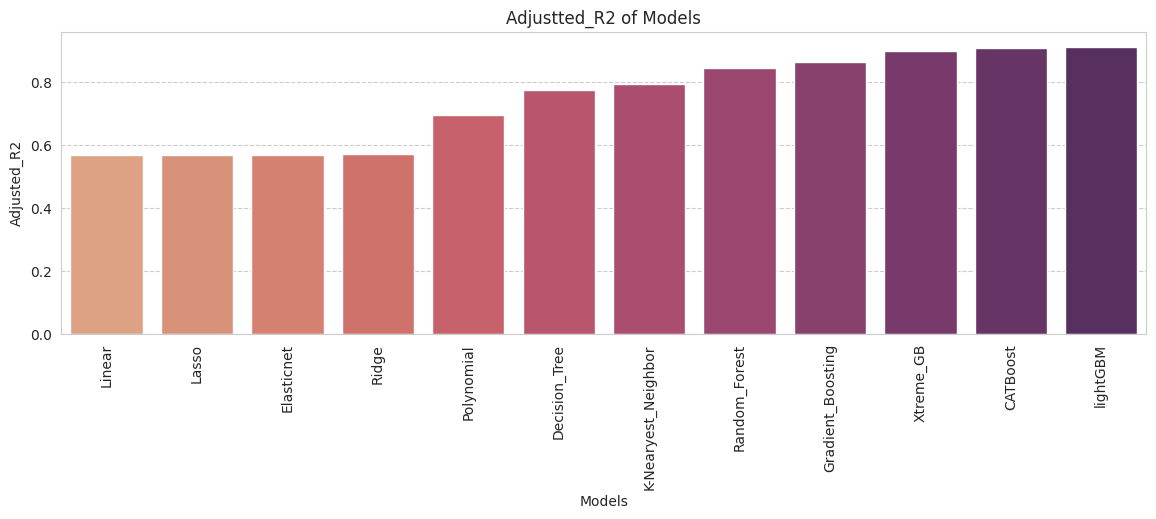

In [ ]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. Summer season had the heighest biike count. people are more likely to take rented bikes in summer.

2. from march bike rent count started increasing and it was heighest in june

3. high number of bikes were rented on No holidays, which is almost 700 bikes

4. Zero bikes were rented on functioning day

5. bike rental trend according to hours almost similar in all scenarios

6. the sudden peak between 6/7AM to 10AM.office/college going time could be the reason for suden peeak on No Holiday.

7. again there is peak between 4PM and 7PM, may be its office leaving time for the above people

8. Distribution is Rightly skewed and some outliers observed, to normalize the distribution we applied Square root method, after normalize no outliers were found






* As we have calculated MAE,MSE,RMSE and R2 score for each model. Based on r2 score will decide our model performance.
* 
Our assumption: if the differnece of R2 score between Train data and Test is more than 5 % we will consider it as overfitting.

**Linear,Lasso,Ridge and ElasticNet.**

* From The above data frame, we can see that linear,Lasso,Ridge and Elastic regression models have almost similar R2 scores(56%) on both training and test data.(Even after using GridserachCV we have got similar results as of base models)

**Decision Tree Regressor:**

* On Decision tree regressor model, without hyperparameter tuning we got r2 score as 100% on training data and on test data it was very less. Thus our model memorised the data.So it was a overfitted model.

* After hyperparameter tuning we got r2 score as 80% on training data and 83% on test data which is quite good for us.

**Random Forest:**

* On Random Forest regressor model, without hyperparameter tuning we got r2 score as 98% on training data and 90% on test data. Thus our model memorised the data.So it was a overfitted model, as per our assumption

* After hyperparameter tuning we got r2 score as 90% on training data and 87% on test data which is very good for us.

**Gradient Boosting Regression(Gradient Boosting Machine):**

* On Random Forest regressor model, without hyperparameter tuning we got r2 score as 86% on training data and 85% on test data.Our model performed well without hyperparameter tuning.

* After hyperparameter tuning we got r2 score as 96% on training data and 91% on test data,thus we improved the model performance by hyperparameter tuning.

* Thus Gradient Boosting Regression(GridSearchCV) and Random forest(gridSearchCv) gives good r2 scores. We can deploy this models.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***